In [ ]:
# Capstone Project

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Adjust settings so all columns show
pd. set_option('display.max_columns', None)

### Inspecting & Cleaning Claims data

In [2]:
import pandas as pd

# Load Claims data
data_claims = pd.read_excel('/Users/kirsten/Claim 5.18 - De_ID.xlsx')

In [4]:
# View number of rows,columns
data_claims.shape

(24294, 72)

In [5]:
# View data set info
data_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24294 entries, 0 to 24293
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   De_ID                           24294 non-null  object        
 1   srvday                          24294 non-null  datetime64[ns]
 2   clmcreatedday                   24294 non-null  datetime64[ns]
 3   firstsubmit                     23749 non-null  datetime64[ns]
 4   lastsubmit                      23749 non-null  datetime64[ns]
 5   remitdate                       23688 non-null  datetime64[ns]
 6   primary status                  24294 non-null  object        
 7   secondary status                24294 non-null  object        
 8   all chgs                        24294 non-null  float64       
 9   net pmt                         24294 non-null  float64       
 10  claimchargerevcode              0 non-null      float64       
 11  ch

In [6]:
# Remove spaces from variable names
data_claims.columns = data_claims.columns.str.replace(' ', '_')

In [7]:
# View updated data set info
data_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24294 entries, 0 to 24293
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   De_ID                           24294 non-null  object        
 1   srvday                          24294 non-null  datetime64[ns]
 2   clmcreatedday                   24294 non-null  datetime64[ns]
 3   firstsubmit                     23749 non-null  datetime64[ns]
 4   lastsubmit                      23749 non-null  datetime64[ns]
 5   remitdate                       23688 non-null  datetime64[ns]
 6   primary_status                  24294 non-null  object        
 7   secondary_status                24294 non-null  object        
 8   all_chgs                        24294 non-null  float64       
 9   net_pmt                         24294 non-null  float64       
 10  claimchargerevcode              0 non-null      float64       
 11  ch

In [8]:
# View values for primary_status column
data_claims['primary_status'].value_counts()

primary_status
CLOSED        24062
HOLD             95
MGRHOLD          76
BILLED           36
OVERPAID         18
ATHENAHOLD        7
Name: count, dtype: int64

In [9]:
# Per Data Definitions, remove records with primary_status = FOLLOWUP, ATHENADROP, BILLED, and DROP

categories_to_exclude = ['ATHENADROP', 'BILLED']

data_claims_filt = data_claims[~data_claims['primary_status'].isin(categories_to_exclude)]

data_claims_filt['primary_status'].value_counts()

primary_status
CLOSED        24062
HOLD             95
MGRHOLD          76
OVERPAID         18
ATHENAHOLD        7
Name: count, dtype: int64

In [10]:
# View values for secondary_status column
data_claims['secondary_status'].value_counts()

secondary_status
CLOSED      24202
MGRHOLD        70
BILLED         16
FOLLOWUP        6
Name: count, dtype: int64

In [11]:
# Per Data Definitions, remove records with secondary_status = FOLLOWUP, ATHENADROP, BILLED, and DROP

categories_to_exclude = ['FOLLOWUP', 'BILLED']

data_claims_filt2 = data_claims_filt[~data_claims_filt['secondary_status'].isin(categories_to_exclude)]

data_claims_filt2['secondary_status'].value_counts()

secondary_status
CLOSED     24166
MGRHOLD       70
Name: count, dtype: int64

In [12]:
# View values for patient_primary_ins_pkg_type column
data_claims['patient_primary_ins_pkg_type'].value_counts()

patient_primary_ins_pkg_type
Medicaid                                  8997
Medicare Part B                           8565
Commercial                                2525
Health Maintenance Organization (HMO)     2001
Group Policy                              1504
Personal Payment (Cash - No Insurance)     686
Other                                       15
Supplemental Policy                          1
Name: count, dtype: int64

In [13]:
# For analysis pertaining to insurance claims, remove records with patient_primary_ins_pkg_type = Personal Payment (Cash - No Insurance)

categories_to_exclude = ['Personal Payment (Cash - No Insurance)']

data_claims_filt3 = data_claims_filt[~data_claims_filt['patient_primary_ins_pkg_type'].isin(categories_to_exclude)]

data_claims_filt3['patient_primary_ins_pkg_type'].value_counts()

patient_primary_ins_pkg_type
Medicaid                                 8972
Medicare Part B                          8561
Commercial                               2525
Health Maintenance Organization (HMO)    1994
Group Policy                             1504
Other                                      15
Supplemental Policy                         1
Name: count, dtype: int64

In [14]:
# To reduce cardinality of categories for patient_primary_ins_pkg_type, combine 1 "Supplemental Policy" record with "Other" category

data_claims_filt3['patient_primary_ins_pkg_type'] = data_claims_filt3['patient_primary_ins_pkg_type'].replace({
    'Supplemental Policy': 'Other'
})
data_claims_filt3['patient_primary_ins_pkg_type'].value_counts()

/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_47362/3440612823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_claims_filt3['patient_primary_ins_pkg_type'] = data_claims_filt3['patient_primary_ins_pkg_type'].replace({


patient_primary_ins_pkg_type
Medicaid                                 8972
Medicare Part B                          8561
Commercial                               2525
Health Maintenance Organization (HMO)    1994
Group Policy                             1504
Other                                      16
Name: count, dtype: int64

In [15]:
# View number of rows,columns after filtering out unwanted statuses
data_claims_filt3.shape

(23572, 72)

In [16]:
# Filter out unwanted columns
data_claims_filt4 = data_claims_filt3.filter(['De_ID','srvday', 'firstsubmit', 'lastsubmit', 'all_chgs', 'proccode', 'icd10claimdiagcode01', 'icd10claimdiagcode02',
'icd10claimdiagcode03', 'icd10claimdiagcode04', 'icd10claimdiagcode05', 'icd10claimdiagcode06', 'icd10claimdiagcode07', 'icd10claimdiagcode08',
'icd10claimdiagcode09', 'icd10claimdiagcode10', 'icd10claimdiagcode11', 'icd10claimdiagcode12', 'patient_primary_ins_pkg_name', 
'patient_primary_ins_pkg_type', 'patient_secondary_ins_pkg_name', 'patient_secondary_ins_pkg_type', 'patient_age', 'patientsex'],axis=1)

In [17]:
# View updated dataset info
data_claims_filt4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23572 entries, 0 to 24273
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   De_ID                           23572 non-null  object        
 1   srvday                          23572 non-null  datetime64[ns]
 2   firstsubmit                     23143 non-null  datetime64[ns]
 3   lastsubmit                      23143 non-null  datetime64[ns]
 4   all_chgs                        23572 non-null  float64       
 5   proccode                        23572 non-null  object        
 6   icd10claimdiagcode01            23572 non-null  object        
 7   icd10claimdiagcode02            21424 non-null  object        
 8   icd10claimdiagcode03            18864 non-null  object        
 9   icd10claimdiagcode04            16157 non-null  object        
 10  icd10claimdiagcode05            13554 non-null  object        
 11  icd10cl

In [18]:
# Drop duplicate claims with same procedure code (i.e. same submission)
data_claims_filt_unique = data_claims_filt4.drop_duplicates(subset=['De_ID', 'proccode'], keep='first')
data_claims_filt_unique.shape

(11878, 24)

In [19]:
# Preview dataset
data_claims_filt_unique.head(10)

,De_ID,srvday,firstsubmit,lastsubmit,all_chgs,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex
0,CLM03667,2015-10-01,2016-02-26,2016-02-26,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F
2,CLM01748,2015-10-07,2016-03-22,2016-03-25,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F
3,CLM03701,2015-10-21,2016-02-18,2016-02-18,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M
5,CLM00864,2015-10-23,2016-05-03,2016-05-03,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F
7,CLM10664,2015-11-05,2016-02-23,2016-05-03,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M
8,CLM03696,2015-11-06,2016-03-25,2016-03-25,449.79,99215,F603,F413,M5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F
9,CLM00058,2015-11-07,2016-04-13,2016-04-13,637.36,99205,N390,E089,I10,M06041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDICARE-CA SOUTHERN (MEDICARE),Medicare Part B,Mutual of Omaha (Medicare Supplement),Supplemental Policy,79,F
13,CLM10612,2015-11-27,2016-05-03,2016-05-03,637.36,99205,E28310,L0889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California - Keenan (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),53,F
15,CLM06250,2015-11-30,2016-02-26,2016-02-26,637.36,99205,F064,F3132,J45909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GWH-Cigna - Cigna (EPO),Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),40,F
17,CLM04463,2015-12-02,2016-02-26,2016-02-26,136.57,99212,H8143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M


In [20]:
# Check for missing values
data_claims_filt_unique.isnull().sum()

De_ID                                 0
srvday                                0
firstsubmit                         178
lastsubmit                          178
all_chgs                              0
proccode                              0
icd10claimdiagcode01                  0
icd10claimdiagcode02               1076
icd10claimdiagcode03               2381
icd10claimdiagcode04               3726
icd10claimdiagcode05               4976
icd10claimdiagcode06               5934
icd10claimdiagcode07               6773
icd10claimdiagcode08               7592
icd10claimdiagcode09               8323
icd10claimdiagcode10               8964
icd10claimdiagcode11               9535
icd10claimdiagcode12              10101
patient_primary_ins_pkg_name          0
patient_primary_ins_pkg_type          0
patient_secondary_ins_pkg_name        0
patient_secondary_ins_pkg_type        0
patient_age                           0
patientsex                            0
dtype: int64

In [21]:
# Rename all_chgs to Total_Charges to align with denials dataset for merge
data_claims_filt_unique = data_claims_filt_unique.rename(columns={'all_chgs': 'Total_Charge'})
data_claims_filt_unique.head() 

,De_ID,srvday,firstsubmit,lastsubmit,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex
0,CLM03667,2015-10-01,2016-02-26,2016-02-26,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F
2,CLM01748,2015-10-07,2016-03-22,2016-03-25,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F
3,CLM03701,2015-10-21,2016-02-18,2016-02-18,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M
5,CLM00864,2015-10-23,2016-05-03,2016-05-03,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F
7,CLM10664,2015-11-05,2016-02-23,2016-05-03,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M


### Inspecting and Cleaning Denial Data

In [22]:
# Load denials data
data_denials = pd.read_excel('/Users/kirsten/Denials 5.18 - De_ID.xlsx')

In [23]:
data_denials.shape

(2998, 22)

In [24]:
data_denials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   De_ID                              2998 non-null   object        
 1   Denial Date                        2998 non-null   datetime64[ns]
 2   Date of Service                    2998 non-null   datetime64[ns]
 3   Transfer Type                      2998 non-null   int64         
 4   Insurance Package                  2998 non-null   object        
 5   Insurance Reporting Category       2998 non-null   object        
 6   Custom Insurance Grouping          0 non-null      float64       
 7   Claim Status                       2998 non-null   object        
 8   Procedure Code                     1934 non-null   object        
 9   ICD-9 Diagnosis Code 1             1868 non-null   object        
 10  ICD-9 Diagnosis Code 2             1

In [25]:
# remove spaces from variable names
data_denials.columns = data_denials.columns.str.replace(' ', '_')
data_denials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   De_ID                              2998 non-null   object        
 1   Denial_Date                        2998 non-null   datetime64[ns]
 2   Date_of_Service                    2998 non-null   datetime64[ns]
 3   Transfer_Type                      2998 non-null   int64         
 4   Insurance_Package                  2998 non-null   object        
 5   Insurance_Reporting_Category       2998 non-null   object        
 6   Custom_Insurance_Grouping          0 non-null      float64       
 7   Claim_Status                       2998 non-null   object        
 8   Procedure_Code                     1934 non-null   object        
 9   ICD-9_Diagnosis_Code_1             1868 non-null   object        
 10  ICD-9_Diagnosis_Code_2             1

In [26]:
# Filter out unneeded columns
data_denials_filt = data_denials.filter(['De_ID', 'Date_of_Service', 'Procedure_Code','Total_Charge'], axis=1)
data_denials_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   De_ID            2998 non-null   object        
 1   Date_of_Service  2998 non-null   datetime64[ns]
 2   Procedure_Code   1934 non-null   object        
 3   Total_Charge     2986 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 93.8+ KB


In [27]:
# Add Denied flag column
data_denials_filt['Denied'] = 1
data_denials_filt['Denied'] = data_denials_filt['Denied'].astype(int)  # convert to integer (rather than float)
data_denials_filt.head(10)

,De_ID,Date_of_Service,Procedure_Code,Total_Charge,Denied
0,CLM00567,2021-11-15,3045F,0.0,1
1,CLM00613,2018-12-26,99385,0.0,1
2,CLM00613,2018-12-26,NaN,0.0,1
3,CLM00613,2018-12-26,NaN,0.0,1
4,CLM00694,2020-01-08,99213,0.0,1
5,CLM00694,2020-01-08,99213,0.0,1
6,CLM00694,2020-01-08,99213,0.0,1
7,CLM00694,2020-01-08,99213,0.0,1
8,CLM00694,2020-01-08,99213,0.0,1
9,CLM00694,2020-01-08,99213,0.0,1


In [28]:
# Check for missing values
data_denials_filt.isnull().sum()

De_ID                 0
Date_of_Service       0
Procedure_Code     1064
Total_Charge         12
Denied                0
dtype: int64

In [29]:
# Drop duplicates with same De_ID (i.e. same denial)
data_denials_filt_unique = data_denials_filt.drop_duplicates(subset=['De_ID'], keep='first')
data_denials_filt_unique.shape

(1717, 5)

In [30]:
# View preview
data_denials_filt_unique.head(10)

,De_ID,Date_of_Service,Procedure_Code,Total_Charge,Denied
0,CLM00567,2021-11-15,3045F,0.0,1
1,CLM00613,2018-12-26,99385,0.0,1
4,CLM00694,2020-01-08,99213,0.0,1
10,CLM01282,2018-12-21,99385,0.0,1
13,CLM01842,2017-11-01,NaN,0.0,1
15,CLM02505,2017-02-24,99205,0.0,1
17,CLM03050,2019-05-31,NaN,0.0,1
19,CLM03153,2020-04-17,NaN,0.0,1
24,CLM03750,2018-12-28,NaN,0.0,1
29,CLM03861,2019-04-05,99215,0.0,1


### Merging Claims and Denial Data

In [31]:
#Merge Denials with Claims Dataset on De_ID

claims_denials = pd.merge(data_claims_filt_unique, data_denials_filt_unique, on='De_ID', how='left')
claims_denials.shape

(11878, 28)

In [32]:
# View merged dataset info
claims_denials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11878 entries, 0 to 11877
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   De_ID                           11878 non-null  object        
 1   srvday                          11878 non-null  datetime64[ns]
 2   firstsubmit                     11700 non-null  datetime64[ns]
 3   lastsubmit                      11700 non-null  datetime64[ns]
 4   Total_Charge_x                  11878 non-null  float64       
 5   proccode                        11878 non-null  object        
 6   icd10claimdiagcode01            11878 non-null  object        
 7   icd10claimdiagcode02            10802 non-null  object        
 8   icd10claimdiagcode03            9497 non-null   object        
 9   icd10claimdiagcode04            8152 non-null   object        
 10  icd10claimdiagcode05            6902 non-null   object        
 11  ic

In [33]:
#Compare similar columns from each dataset to check for inconsistencies
claims_denials_appt_test = claims_denials.filter(['De_ID','proccode','Procedure_Code', 'Total_Charge_x', 'Total_Charge_y', 'Denied'], axis=1)
claims_denials_appt_test.head(60)

,De_ID,proccode,Procedure_Code,Total_Charge_x,Total_Charge_y,Denied
0,CLM03667,99205,NaN,637.36,NaN,NaN
1,CLM01748,99205,NaN,637.36,637.36,1.0
2,CLM03701,99205,NaN,637.36,NaN,NaN
3,CLM00864,99205,NaN,637.36,637.36,1.0
4,CLM10664,99212,NaN,136.57,NaN,NaN
5,CLM03696,99215,NaN,449.79,449.79,1.0
6,CLM00058,99205,NaN,637.36,NaN,NaN
7,CLM10612,99205,NaN,637.36,637.36,1.0
8,CLM06250,99205,NaN,637.36,637.36,1.0
9,CLM04463,99212,NaN,136.57,NaN,NaN


In [34]:
# See how many total charges don't match between datasets
claims_denials_appt_test['Flag'] = ((claims_denials_appt_test['Denied'] == 1) & (claims_denials_appt_test['Total_Charge_x'] != claims_denials_appt_test['Total_Charge_y'])).astype(int)
claims_denials_appt_test.head(50)

,De_ID,proccode,Procedure_Code,Total_Charge_x,Total_Charge_y,Denied,Flag
0,CLM03667,99205,NaN,637.36,NaN,NaN,0
1,CLM01748,99205,NaN,637.36,637.36,1.0,0
2,CLM03701,99205,NaN,637.36,NaN,NaN,0
3,CLM00864,99205,NaN,637.36,637.36,1.0,0
4,CLM10664,99212,NaN,136.57,NaN,NaN,0
5,CLM03696,99215,NaN,449.79,449.79,1.0,0
6,CLM00058,99205,NaN,637.36,NaN,NaN,0
7,CLM10612,99205,NaN,637.36,637.36,1.0,0
8,CLM06250,99205,NaN,637.36,637.36,1.0,0
9,CLM04463,99212,NaN,136.57,NaN,NaN,0


In [35]:
# Calculate number of records where Total_Charge does not match between claims & denial datasets
claims_denials_appt_test['Flag'].sum()

785

In [36]:
# Remove rows where total charges are not equal (indicating different claim submission) 

claims_denials_filt = claims_denials[~((claims_denials['Denied'] == 1) & (claims_denials['Total_Charge_x'] != claims_denials['Total_Charge_y']))]
claims_denials_filt.shape


(11093, 28)

In [37]:
# Drop redundant columns from claims & denial datasets

claims_denials_filt2 = claims_denials_filt.drop(['Total_Charge_y', 'Procedure_Code', 'Date_of_Service'],axis=1)

#Rename Total_Charge_x back to Total_Charge
claims_denials_filt2 = claims_denials_filt2.rename(columns={'Total_Charge_x': 'Total_Charge'})

In [38]:
# Preview filtered merged dataset
claims_denials_filt2.head(10)

,De_ID,srvday,firstsubmit,lastsubmit,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied
0,CLM03667,2015-10-01,2016-02-26,2016-02-26,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,NaN
1,CLM01748,2015-10-07,2016-03-22,2016-03-25,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1.0
2,CLM03701,2015-10-21,2016-02-18,2016-02-18,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,NaN
3,CLM00864,2015-10-23,2016-05-03,2016-05-03,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1.0
4,CLM10664,2015-11-05,2016-02-23,2016-05-03,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,NaN
5,CLM03696,2015-11-06,2016-03-25,2016-03-25,449.79,99215,F603,F413,M5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1.0
6,CLM00058,2015-11-07,2016-04-13,2016-04-13,637.36,99205,N390,E089,I10,M06041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDICARE-CA SOUTHERN (MEDICARE),Medicare Part B,Mutual of Omaha (Medicare Supplement),Supplemental Policy,79,F,NaN
7,CLM10612,2015-11-27,2016-05-03,2016-05-03,637.36,99205,E28310,L0889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California - Keenan (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),53,F,1.0
8,CLM06250,2015-11-30,2016-02-26,2016-02-26,637.36,99205,F064,F3132,J45909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GWH-Cigna - Cigna (EPO),Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),40,F,1.0
9,CLM04463,2015-12-02,2016-02-26,2016-02-26,136.57,99212,H8143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,NaN


### Inspecting and Cleaning Appointment Data

In [39]:
# Load appointments data
data_appts = pd.read_excel('/Users/kirsten/Appointments 5.18 - De_ID.xlsx')
data_appts.shape

(10680, 5)

In [40]:
# View appointments info
data_appts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10680 entries, 0 to 10679
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   De_ID            10680 non-null  object        
 1   apptdate         10680 non-null  datetime64[ns]
 2   apptcheckindate  10680 non-null  datetime64[ns]
 3   appttype         10680 non-null  object        
 4   HCC RAF score    10680 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 417.3+ KB


In [41]:
#Rename RAF score column
data_appts = data_appts.rename(columns={'HCC RAF score': 'RAF_score'})
data_appts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10680 entries, 0 to 10679
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   De_ID            10680 non-null  object        
 1   apptdate         10680 non-null  datetime64[ns]
 2   apptcheckindate  10680 non-null  datetime64[ns]
 3   appttype         10680 non-null  object        
 4   RAF_score        10680 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 417.3+ KB


In [42]:
# Filter out unneeded columns
data_appts_filt = data_appts.filter(['De_ID', 'appttype', 'RAF_score'], axis = 1)
data_appts_filt.head()

,De_ID,appttype,RAF_score
0,CLM09134,New Patient,0.238
1,CLM01852,New Patient,0.288
2,CLM02664,New Patient,0.340
3,CLM08688,New Patient,0.395
4,CLM04908,Established Patient,0.340


In [43]:
# Drop duplicates with same De_ID (i.e. same appointment)
data_appts_filt_unique = data_appts_filt.drop_duplicates(subset=['De_ID'], keep='first')
data_appts_filt_unique.shape

(10625, 3)

### Merging All Data: Claims/Denials Data with Appointment Data

In [44]:
# Merge with claims and denials data on De_ID

claims_denials_appt = pd.merge(claims_denials_filt2, data_appts_filt_unique, on='De_ID', how='left')
claims_denials_appt.head()

,De_ID,srvday,firstsubmit,lastsubmit,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score
0,CLM03667,2015-10-01,2016-02-26,2016-02-26,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,NaN,NaN,NaN
1,CLM01748,2015-10-07,2016-03-22,2016-03-25,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1.0,NaN,NaN
2,CLM03701,2015-10-21,2016-02-18,2016-02-18,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,NaN,NaN,NaN
3,CLM00864,2015-10-23,2016-05-03,2016-05-03,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1.0,NaN,NaN
4,CLM10664,2015-11-05,2016-02-23,2016-05-03,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,NaN,NaN,NaN


## Exploratory Data Analysis of Full Merged Dataset

In [45]:
claims_denials_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   De_ID                           11093 non-null  object        
 1   srvday                          11093 non-null  datetime64[ns]
 2   firstsubmit                     10916 non-null  datetime64[ns]
 3   lastsubmit                      10916 non-null  datetime64[ns]
 4   Total_Charge                    11093 non-null  float64       
 5   proccode                        11093 non-null  object        
 6   icd10claimdiagcode01            11093 non-null  object        
 7   icd10claimdiagcode02            10042 non-null  object        
 8   icd10claimdiagcode03            8760 non-null   object        
 9   icd10claimdiagcode04            7448 non-null   object        
 10  icd10claimdiagcode05            6242 non-null   object        
 11  ic

In [46]:
claims_denials_appt[['Total_Charge', 'patient_age', 'RAF_score']].describe()

,Total_Charge,patient_age,RAF_score
count,11093.000000,11093.000000,10881.000000
mean,149.730421,52.118002,0.376507
std,123.395262,17.185667,0.245502
min,0.000000,18.000000,0.106000
25%,57.200000,38.000000,0.238000
50%,146.200000,52.000000,0.332000
75%,196.000000,65.000000,0.401000
max,1460.000000,100.000000,2.199000


In [47]:
claims_denials_appt[['Total_Charge', 'patient_age', 'RAF_score']].agg(['mean', 'std', 'min', 'max'])

,Total_Charge,patient_age,RAF_score
mean,149.730421,52.118002,0.376507
std,123.395262,17.185667,0.245502
min,0.000000,18.000000,0.106000
max,1460.000000,100.000000,2.199000


In [48]:
# Count Unique Values Across all ICD columns

# Number of unique values for all columns
unique_counts_all = claims_denials_appt.nunique()

# Number of unique values for icd10claimdiagcode01 to icd10claimdiagcode12 specifically
diag_cols = [f'icd10claimdiagcode{str(i).zfill(2)}' for i in range(1, 13)]
unique_counts_diag = claims_denials_appt[diag_cols].nunique()

# Display results
print("🔢 Unique values in all columns:")
print(unique_counts_all)

print("\n🧬 Unique values in diagnosis columns (icd10claimdiagcode01–12):")
print(unique_counts_diag)

🔢 Unique values in all columns:
De_ID                             10153
srvday                             1476
firstsubmit                        1633
lastsubmit                         1681
Total_Charge                        163
proccode                            147
icd10claimdiagcode01               1330
icd10claimdiagcode02               1220
icd10claimdiagcode03               1112
icd10claimdiagcode04               1002
icd10claimdiagcode05                878
icd10claimdiagcode06                802
icd10claimdiagcode07                704
icd10claimdiagcode08                695
icd10claimdiagcode09                637
icd10claimdiagcode10                589
icd10claimdiagcode11                519
icd10claimdiagcode12                434
patient_primary_ins_pkg_name        165
patient_primary_ins_pkg_type          6
patient_secondary_ins_pkg_name       50
patient_secondary_ins_pkg_type        8
patient_age                          82
patientsex                            2
Denied  

In [49]:
# Quantify missing values for all columns

claims_denials_appt.isnull().sum()

De_ID                                0
srvday                               0
firstsubmit                        177
lastsubmit                         177
Total_Charge                         0
proccode                             0
icd10claimdiagcode01                 0
icd10claimdiagcode02              1051
icd10claimdiagcode03              2333
icd10claimdiagcode04              3645
icd10claimdiagcode05              4851
icd10claimdiagcode06              5761
icd10claimdiagcode07              6549
icd10claimdiagcode08              7290
icd10claimdiagcode09              7957
icd10claimdiagcode10              8545
icd10claimdiagcode11              9050
icd10claimdiagcode12              9556
patient_primary_ins_pkg_name         0
patient_primary_ins_pkg_type         0
patient_secondary_ins_pkg_name       0
patient_secondary_ins_pkg_type       0
patient_age                          0
patientsex                           0
Denied                            9726
appttype                 

In [50]:
# Impute Denied = 0 (for non-denied claims), then re-check for missing values

# Fill any missing values with 0, then cast to int
claims_denials_appt['Denied'] = claims_denials_appt['Denied'].fillna(0).astype(int)
claims_denials_appt.isnull().sum()

De_ID                                0
srvday                               0
firstsubmit                        177
lastsubmit                         177
Total_Charge                         0
proccode                             0
icd10claimdiagcode01                 0
icd10claimdiagcode02              1051
icd10claimdiagcode03              2333
icd10claimdiagcode04              3645
icd10claimdiagcode05              4851
icd10claimdiagcode06              5761
icd10claimdiagcode07              6549
icd10claimdiagcode08              7290
icd10claimdiagcode09              7957
icd10claimdiagcode10              8545
icd10claimdiagcode11              9050
icd10claimdiagcode12              9556
patient_primary_ins_pkg_name         0
patient_primary_ins_pkg_type         0
patient_secondary_ins_pkg_name       0
patient_secondary_ins_pkg_type       0
patient_age                          0
patientsex                           0
Denied                               0
appttype                 

In [51]:
diag_cols = [f'icd10claimdiagcode{str(i).zfill(2)}' for i in range(1, 13)]

# Stack all the diagnosis columns into one Series and count unique values
unique_diag_codes = pd.unique(claims_denials_appt[diag_cols].values.ravel())
total_unique_diag_codes = len(unique_diag_codes)

print(f"🔢 Total unique diagnosis codes across all 12 columns: {total_unique_diag_codes}")


🔢 Total unique diagnosis codes across all 12 columns: 2486


In [52]:
# Step 1: Define the diagnosis code columns
diag_cols = [f'icd10claimdiagcode{str(i).zfill(2)}' for i in range(1, 13)]

# Step 2: Flatten all diagnosis values from the 12 columns
flattened_diag_values = claims_denials_appt[diag_cols].values.ravel()

# Step 3: Create a Series and drop missing values
all_diag_series = pd.Series(flattened_diag_values).dropna()

# Step 4: Count occurrences and get top 5
top_5_diag_codes = all_diag_series.value_counts().head(5)

# Step 5: Print results
print("🏆 Top 5 most common ICD-10 diagnosis codes across all 12 columns:")
print(top_5_diag_codes)

🏆 Top 5 most common ICD-10 diagnosis codes across all 12 columns:
Z0001     3725
Z13220    2914
Z131      2437
I10       2100
E7800     1857
Name: count, dtype: int64


In [53]:
# Step 6: Melt the diagnosis columns into long format with Denied
melted_diag = claims_denials_appt.melt(
    id_vars='Denied',
    value_vars=diag_cols,
    var_name='diag_column',
    value_name='icd10_code'
).dropna()

# Step 7: Filter only the top 5 diagnosis codes
top_5_codes = top_5_diag_codes.index.tolist()
filtered_diag = melted_diag[melted_diag['icd10_code'].isin(top_5_codes)]

# Step 8: Group by diagnosis code and Denied status
diag_denial_counts = (
    filtered_diag
    .groupby(['icd10_code', 'Denied'])
    .size()
    .reset_index(name='count')
    .pivot(index='icd10_code', columns='Denied', values='count')
    .fillna(0)
    .astype(int)
)

# Step 9: Rename columns for readability (optional)
diag_denial_counts.columns = ['Accepted', 'Denied']
diag_denial_counts['Total'] = diag_denial_counts.sum(axis=1)

# Display the results
print(diag_denial_counts)

            Accepted  Denied  Total
icd10_code                         
E7800           1666     191   1857
I10             1829     271   2100
Z0001           3146     579   3725
Z131            2061     376   2437
Z13220          2460     454   2914


In [54]:
claims_denials_appt.head()

,De_ID,srvday,firstsubmit,lastsubmit,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score
0,CLM03667,2015-10-01,2016-02-26,2016-02-26,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,0,NaN,NaN
1,CLM01748,2015-10-07,2016-03-22,2016-03-25,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1,NaN,NaN
2,CLM03701,2015-10-21,2016-02-18,2016-02-18,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN
3,CLM00864,2015-10-23,2016-05-03,2016-05-03,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1,NaN,NaN
4,CLM10664,2015-11-05,2016-02-23,2016-05-03,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN


In [55]:
claims_denials_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   De_ID                           11093 non-null  object        
 1   srvday                          11093 non-null  datetime64[ns]
 2   firstsubmit                     10916 non-null  datetime64[ns]
 3   lastsubmit                      10916 non-null  datetime64[ns]
 4   Total_Charge                    11093 non-null  float64       
 5   proccode                        11093 non-null  object        
 6   icd10claimdiagcode01            11093 non-null  object        
 7   icd10claimdiagcode02            10042 non-null  object        
 8   icd10claimdiagcode03            8760 non-null   object        
 9   icd10claimdiagcode04            7448 non-null   object        
 10  icd10claimdiagcode05            6242 non-null   object        
 11  ic

### Feature Engineering for Date Variables

In [56]:
# Feature Engineer Date Variables

claims_denials_appt['Month_Service'] = claims_denials_appt['srvday'].dt.month
claims_denials_appt['Year_Service'] = claims_denials_appt['srvday'].dt.year
claims_denials_appt['Day_of_Week_Service'] = claims_denials_appt['srvday'].dt.weekday
claims_denials_appt['Initial_Submission_Delay'] = (claims_denials_appt['firstsubmit'] - claims_denials_appt['srvday']).dt.days
claims_denials_appt['Final_Submission_Delay'] = (claims_denials_appt['lastsubmit'] - claims_denials_appt['srvday']).dt.days
claims_denials_appt.head()

,De_ID,srvday,firstsubmit,lastsubmit,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay
0,CLM03667,2015-10-01,2016-02-26,2016-02-26,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,0,NaN,NaN,10,2015,3,148.0,148.0
1,CLM01748,2015-10-07,2016-03-22,2016-03-25,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1,NaN,NaN,10,2015,2,167.0,170.0
2,CLM03701,2015-10-21,2016-02-18,2016-02-18,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,10,2015,2,120.0,120.0
3,CLM00864,2015-10-23,2016-05-03,2016-05-03,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1,NaN,NaN,10,2015,4,193.0,193.0
4,CLM10664,2015-11-05,2016-02-23,2016-05-03,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,11,2015,3,110.0,180.0


In [57]:
# Feature Engineer Quarter_Service Variable

def get_fiscal_quarter(date):
    if pd.isnull(date):
        return None
    month = date.month
    if 1 <= month <= 3:
        return 'Q1'
    elif 4 <= month <= 6:
        return 'Q2'
    elif 7 <= month <= 9:
        return 'Q3'
    else:  # 10 <= month <= 12
        return 'Q4'


claims_denials_appt['Quarter_Service'] = claims_denials_appt['srvday'].apply(get_fiscal_quarter)
claims_denials_appt.head()

,De_ID,srvday,firstsubmit,lastsubmit,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,Quarter_Service
0,CLM03667,2015-10-01,2016-02-26,2016-02-26,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,0,NaN,NaN,10,2015,3,148.0,148.0,Q4
1,CLM01748,2015-10-07,2016-03-22,2016-03-25,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1,NaN,NaN,10,2015,2,167.0,170.0,Q4
2,CLM03701,2015-10-21,2016-02-18,2016-02-18,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,10,2015,2,120.0,120.0,Q4
3,CLM00864,2015-10-23,2016-05-03,2016-05-03,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1,NaN,NaN,10,2015,4,193.0,193.0,Q4
4,CLM10664,2015-11-05,2016-02-23,2016-05-03,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,11,2015,3,110.0,180.0,Q4


In [58]:
# Feature Engineer COVID flags

claims_denials_appt['pre_COVID'] = (claims_denials_appt['Year_Service'] < 2020).astype(int)
claims_denials_appt['COVID_era'] = (
    (claims_denials_appt['Year_Service'] >= 2020) & 
    (claims_denials_appt['Year_Service'] <= 2022)
).astype(int)
claims_denials_appt['post_COVID'] = (claims_denials_appt['Year_Service'] > 2022).astype(int)
claims_denials_appt.head()

,De_ID,srvday,firstsubmit,lastsubmit,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,Quarter_Service,pre_COVID,COVID_era,post_COVID
0,CLM03667,2015-10-01,2016-02-26,2016-02-26,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,0,NaN,NaN,10,2015,3,148.0,148.0,Q4,1,0,0
1,CLM01748,2015-10-07,2016-03-22,2016-03-25,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1,NaN,NaN,10,2015,2,167.0,170.0,Q4,1,0,0
2,CLM03701,2015-10-21,2016-02-18,2016-02-18,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,10,2015,2,120.0,120.0,Q4,1,0,0
3,CLM00864,2015-10-23,2016-05-03,2016-05-03,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1,NaN,NaN,10,2015,4,193.0,193.0,Q4,1,0,0
4,CLM10664,2015-11-05,2016-02-23,2016-05-03,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,11,2015,3,110.0,180.0,Q4,1,0,0


In [59]:
claims_denials_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   De_ID                           11093 non-null  object        
 1   srvday                          11093 non-null  datetime64[ns]
 2   firstsubmit                     10916 non-null  datetime64[ns]
 3   lastsubmit                      10916 non-null  datetime64[ns]
 4   Total_Charge                    11093 non-null  float64       
 5   proccode                        11093 non-null  object        
 6   icd10claimdiagcode01            11093 non-null  object        
 7   icd10claimdiagcode02            10042 non-null  object        
 8   icd10claimdiagcode03            8760 non-null   object        
 9   icd10claimdiagcode04            7448 non-null   object        
 10  icd10claimdiagcode05            6242 non-null   object        
 11  ic

### Examine Distributions of Numeric Variables

Histogram of Total Claim Charge


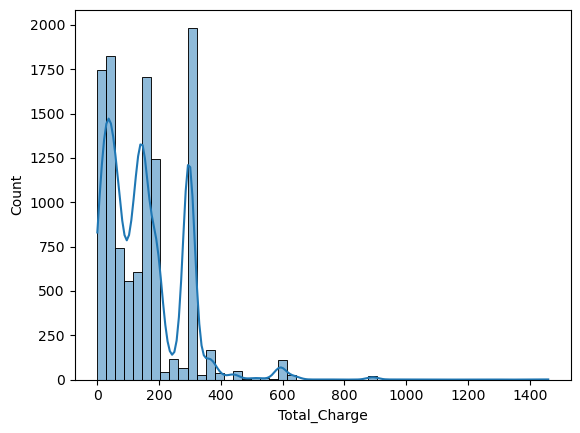

In [60]:

import seaborn as sns
import matplotlib.pyplot as plt

#total charge
print('Histogram of Total Claim Charge')
sns.histplot(data=claims_denials_appt, x='Total_Charge', bins=50, kde=True)
plt.show()

Text(0.5, 0, 'Total_Charge')

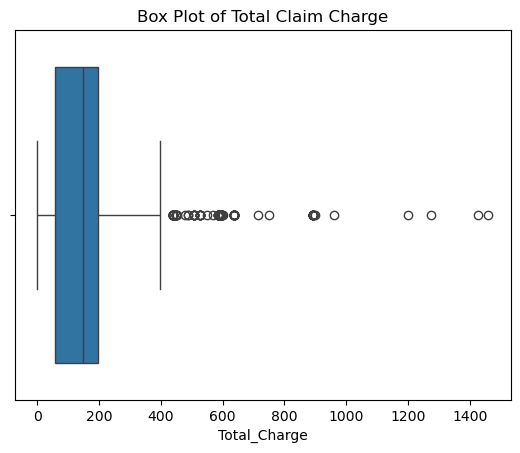

In [61]:
# Plot boxplot of Total_Charge to investigate outliers

sns.boxplot(x=claims_denials_appt['Total_Charge'])
plt.title('Box Plot of Total Claim Charge')
plt.xlabel('Total_Charge')

Histogram of Patient Age


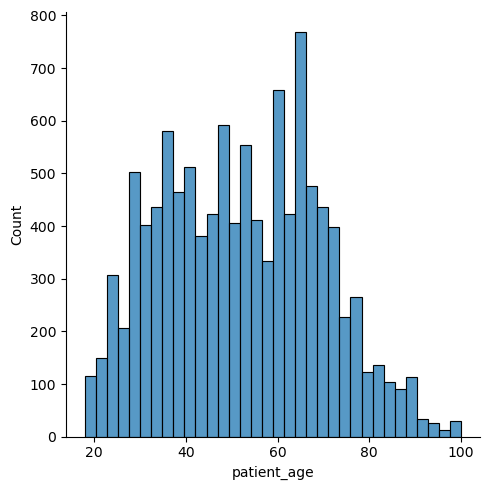

In [62]:
#patient age
print('Histogram of Patient Age')
sns.displot(data=claims_denials_appt['patient_age'])
plt.show()

Histogram of RAF Score


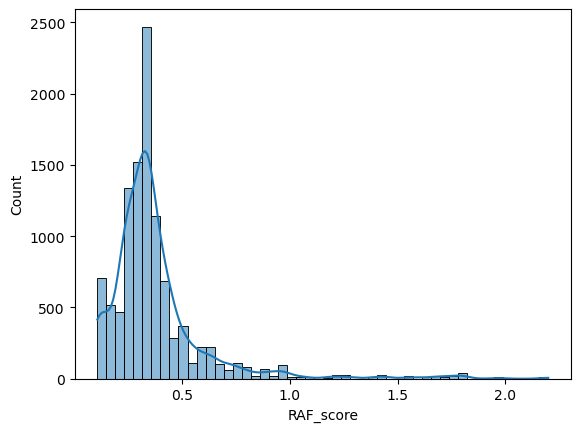

In [63]:
#RAF Score
print('Histogram of RAF Score')
sns.histplot(data=claims_denials_appt, x='RAF_score', bins=50, kde=True)
plt.show()

Text(0.5, 0, 'RAF_score')

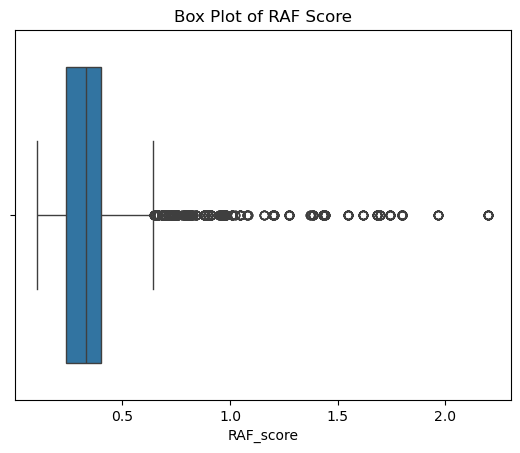

In [64]:
# Plot boxplot of RAF_score to investigate outliers

sns.boxplot(x=claims_denials_appt['RAF_score'])
plt.title('Box Plot of RAF Score')
plt.xlabel('RAF_score')

In [65]:
claims_denials_appt[['Total_Charge', 'patient_age', 'RAF_score', 'Initial_Submission_Delay', 'Final_Submission_Delay']].agg(['min', 'max', 'mean', 'std'])

,Total_Charge,patient_age,RAF_score,Initial_Submission_Delay,Final_Submission_Delay
min,0.000000,18.000000,0.106000,0.000000,0.000000
max,1460.000000,100.000000,2.199000,2533.000000,2951.000000
mean,149.730421,52.118002,0.376507,26.779498,36.510443
std,123.395262,17.185667,0.245502,131.798010,153.677722


Histogram of Initial Claim Submission Delay


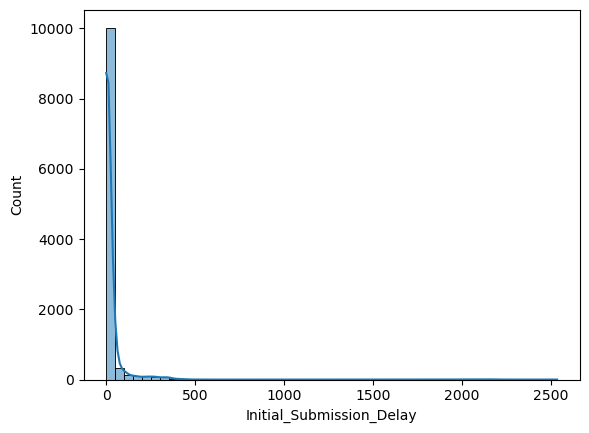

In [66]:
#Initial Submission Delay
print('Histogram of Initial Claim Submission Delay')
sns.histplot(data=claims_denials_appt, x='Initial_Submission_Delay', bins=50, kde=True)
plt.show()

Text(0.5, 0, 'Initial_Submission_Delay')

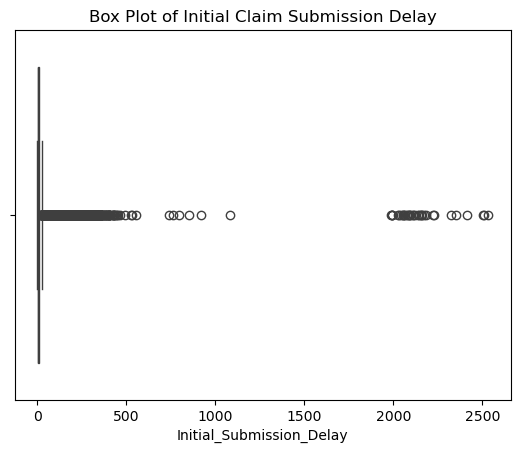

In [67]:
# Plot boxplot of Initial_Submission_Delay to investigate outliers

sns.boxplot(x=claims_denials_appt['Initial_Submission_Delay'])
plt.title('Box Plot of Initial Claim Submission Delay')
plt.xlabel('Initial_Submission_Delay')

Histogram of Final Claim Submission Delay


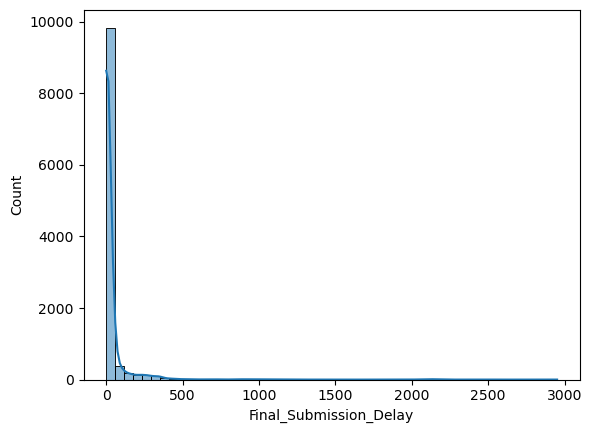

In [68]:
#Final Submission Delay
print('Histogram of Final Claim Submission Delay')
sns.histplot(data=claims_denials_appt, x='Final_Submission_Delay', bins=50, kde=True)
plt.show()

Text(0.5, 0, 'Final_Submission_Delay')

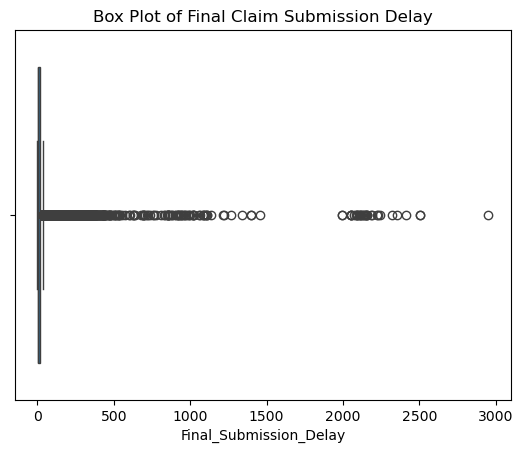

In [69]:
# Plot boxplot of Submission_Delay to investigate outliers

sns.boxplot(x=claims_denials_appt['Final_Submission_Delay'])
plt.title('Box Plot of Final Claim Submission Delay')
plt.xlabel('Final_Submission_Delay')

Histogram of Month of Service


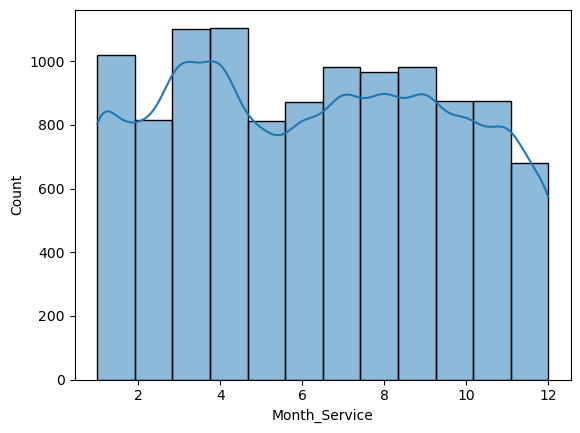

In [70]:
#Month of Service
print('Histogram of Month of Service')
sns.histplot(data=claims_denials_appt, x='Month_Service', bins=12, kde=True)
plt.show()

Histogram of Year of Service


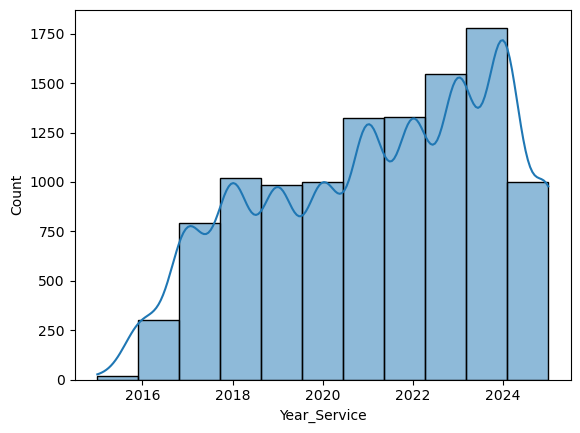

In [71]:
#Year of Service
print('Histogram of Year of Service')
sns.histplot(data=claims_denials_appt, x='Year_Service', bins=11, kde=True)
plt.show()

Histogram of Day of Week of Service


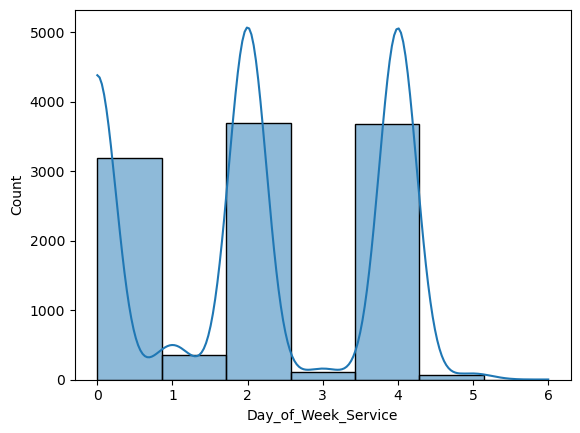

In [72]:
#Week Day of Service
print('Histogram of Day of Week of Service')
sns.histplot(data=claims_denials_appt, x='Day_of_Week_Service', bins=7, kde=True)
plt.show()

In [73]:
#Drop srvday, firstsubmit, lastsubmit

claims_denials_appt.drop(['srvday', 'firstsubmit', "lastsubmit"], axis=1, inplace=True)

In [74]:
# Descriptive Statistics of numeric variables

print('Descriptive Statistics:')
claims_denials_appt.describe()

Descriptive Statistics:


,Total_Charge,patient_age,Denied,RAF_score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,pre_COVID,COVID_era,post_COVID
count,11093.000000,11093.000000,11093.000000,10881.000000,11093.000000,11093.000000,11093.000000,10916.000000,10916.000000,11093.000000,11093.000000,11093.000000
mean,149.730421,52.118002,0.123231,0.376507,6.282070,2021.268728,2.084017,26.779498,36.510443,0.280537,0.329217,0.390246
std,123.395262,17.185667,0.328717,0.245502,3.383105,2.575998,1.601413,131.798010,153.677722,0.449282,0.469950,0.487827
min,0.000000,18.000000,0.000000,0.106000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.200000,38.000000,0.000000,0.238000,3.000000,2019.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,146.200000,52.000000,0.000000,0.332000,6.000000,2022.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000
75%,196.000000,65.000000,0.000000,0.401000,9.000000,2024.000000,4.000000,11.000000,15.000000,1.000000,1.000000,1.000000
max,1460.000000,100.000000,1.000000,2.199000,12.000000,2025.000000,6.000000,2533.000000,2951.000000,1.000000,1.000000,1.000000


In [75]:
claims_denials_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   De_ID                           11093 non-null  object 
 1   Total_Charge                    11093 non-null  float64
 2   proccode                        11093 non-null  object 
 3   icd10claimdiagcode01            11093 non-null  object 
 4   icd10claimdiagcode02            10042 non-null  object 
 5   icd10claimdiagcode03            8760 non-null   object 
 6   icd10claimdiagcode04            7448 non-null   object 
 7   icd10claimdiagcode05            6242 non-null   object 
 8   icd10claimdiagcode06            5332 non-null   object 
 9   icd10claimdiagcode07            4544 non-null   object 
 10  icd10claimdiagcode08            3803 non-null   object 
 11  icd10claimdiagcode09            3136 non-null   object 
 12  icd10claimdiagcode10            

### Examining Frequencies and Values of Categorical Variables

In [76]:
# Procedure Code
claims_denials_appt.proccode.value_counts()

proccode
99213         1856
99215         1553
99205          934
99214          836
99213,95       652
              ... 
93272            1
93040            1
MISCLASER1       1
G8483            1
4004F            1
Name: count, Length: 147, dtype: int64

In [77]:
# Step 1: Get the top 5 most common procedure codes overall
top_5_proccodes = claims_denials_appt['proccode'].value_counts().head(5).index.tolist()

# Step 2: Filter dataset to only include those top 5 procedure codes
filtered_procs = claims_denials_appt[claims_denials_appt['proccode'].isin(top_5_proccodes)]

# Step 3: Group by procedure code and denial status, and count
proc_denial_counts = (
    filtered_procs
    .groupby(['proccode', 'Denied'])
    .size()
    .reset_index(name='count')
    .pivot(index='proccode', columns='Denied', values='count')
    .fillna(0)
    .astype(int)
)

# Step 4: Rename columns for clarity (optional)
proc_denial_counts.columns = ['Accepted', 'Denied']
proc_denial_counts['Total'] = proc_denial_counts.sum(axis=1)

# Show the result
print(proc_denial_counts)

          Accepted  Denied  Total
proccode                         
99205          738     196    934
99213         1702     154   1856
99214          742      94    836
99215         1416     137   1553
99213,95       612      40    652


In [78]:
# icd10claimdiagcode01
claims_denials_appt.icd10claimdiagcode01.value_counts()

icd10claimdiagcode01
Z0001     2578
I10        451
E7800      345
Z0000      330
F419       281
          ... 
H7292        1
R419         1
M4692        1
M75101       1
K121         1
Name: count, Length: 1330, dtype: int64

In [79]:
# patient_primary_ins_pkg_name
claims_denials_appt.patient_primary_ins_pkg_name.value_counts()

patient_primary_ins_pkg_name
Community Health Group (Medicaid Replacement - HMO)                                         5424
Molina Healthcare of CA (HMO)                                                                945
Molina Healthcare of CA (Medicaid Replacement - HMO)                                         928
MEDICARE-CA SOUTHERN (MEDICARE)                                                              704
Community Health Group                                                                       566
                                                                                            ... 
BCBS-PA Capital Blue Cross - FEP (PPO)                                                         1
Imperial Health Holdings - BCBS-CA Blue Cross of California (Medicaid Replacement - HMO)       1
SHARP COMMUNITY MEDICAL GROUP - BCBS-CA BLUE SHIELD OF CALIFORNIA (HMO)                        1
United Healthcare Community Plan (Medicaid Replacement - HMO)                                  1
A

In [80]:
# patient_primary_ins_pkg_type
claims_denials_appt.patient_primary_ins_pkg_type.value_counts()

patient_primary_ins_pkg_type
Medicaid                                 6590
Medicare Part B                          1756
Commercial                               1197
Health Maintenance Organization (HMO)    1016
Group Policy                              533
Other                                       1
Name: count, dtype: int64

In [81]:
# patient_secondary_ins_pkg_name
claims_denials_appt.patient_secondary_ins_pkg_name.value_counts()

patient_secondary_ins_pkg_name
*SELF PAY*                                                                                                 10138
Community Health Group (Medicaid Replacement - HMO)                                                          366
Molina Healthcare of CA (Medicaid Replacement - HMO)                                                          96
BCBS-CA Blue Cross of California (Medicare Supplement)                                                        82
Community Health Group                                                                                        62
MEDICARE-CA SOUTHERN (MEDICARE)                                                                               42
Blue Shield of California Promise Health Plan (Medicaid Replacement - HMO)                                    34
Community Health Group - Dual Eligible (Medicare Replacement/Advantage - HMO)                                 32
Tricare for Life (TRICARE - Medicare Supplement)                 

In [82]:
# patient_secondary_ins_pkg_type
claims_denials_appt.patient_secondary_ins_pkg_type.value_counts()

patient_secondary_ins_pkg_type
Personal Payment (Cash - No Insurance)    10138
Medicaid                                    524
Medicare Part B                             129
Group Policy                                120
Commercial                                   94
Supplemental Policy                          78
Health Maintenance Organization (HMO)         9
Other                                         1
Name: count, dtype: int64

In [83]:
# patientsex
claims_denials_appt.patientsex.value_counts()

patientsex
F    7490
M    3603
Name: count, dtype: int64

In [84]:
# appttype
claims_denials_appt.appttype.value_counts()

appttype
Follow Up                      3504
New Patient                    2834
Telehealth Visit               1962
Annual Visit                   1577
ANY 20                          534
General Consultation            178
Medicare Annual Wellness        110
Established Patient              88
Procedure (cash)                 27
Hormone Replacement              18
Lab Work                         14
Biofeedback Therapy              11
functional medicine consult      11
COGNITIVE CONSULTATION            4
VACCINATION                       3
hair removal                      3
cosmetic treatments               1
Preliminary Consultation          1
Membership visit                  1
Name: count, dtype: int64

In [85]:
# To reduce cardinality of appttype variable and per discussion with physician, rename some appointment types as follows:

# Create mapping for specific replacements
appttype_mapping = {
    'ANY 20': 'Follow Up',
    'Established Patient': 'Follow Up',
    'Medicare Annual Wellness': 'Annual Visit',
    'Procedure (cash)': 'Other',
    'Hormone Replacement': 'Other',
    'Lab Work': 'Other',
    'Biofeedback Therapy': 'Other',
    'functional medicine consult': 'Other',
    'COGNITIVE CONSULTATION': 'Other',
    'VACCINATION': 'Other',
    'hair removal': 'Other',
    'cosmetic treatments': 'Other',
    'Preliminary Consultation': 'Other',
    'Membership visit': 'Other'
}

# Apply the mapping
claims_denials_appt['appttype'] = claims_denials_appt['appttype'].replace(appttype_mapping)
claims_denials_appt.appttype.value_counts()

appttype
Follow Up               4126
New Patient             2834
Telehealth Visit        1962
Annual Visit            1687
General Consultation     178
Other                     94
Name: count, dtype: int64

In [86]:
# Quarter_Service
claims_denials_appt.Quarter_Service.value_counts()

Quarter_Service
Q1    2939
Q3    2932
Q2    2790
Q4    2432
Name: count, dtype: int64

### Examining Dependent Variable: 'Denied'

In [87]:
# Denied
claims_denials_appt.Denied.value_counts()

Denied
0    9726
1    1367
Name: count, dtype: int64

<Axes: xlabel='Denied', ylabel='count'>

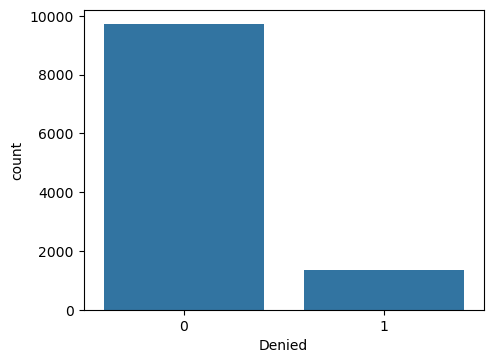

In [88]:
# Target Variable Breakdown
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'Denied')

/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_47362/3415016948.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


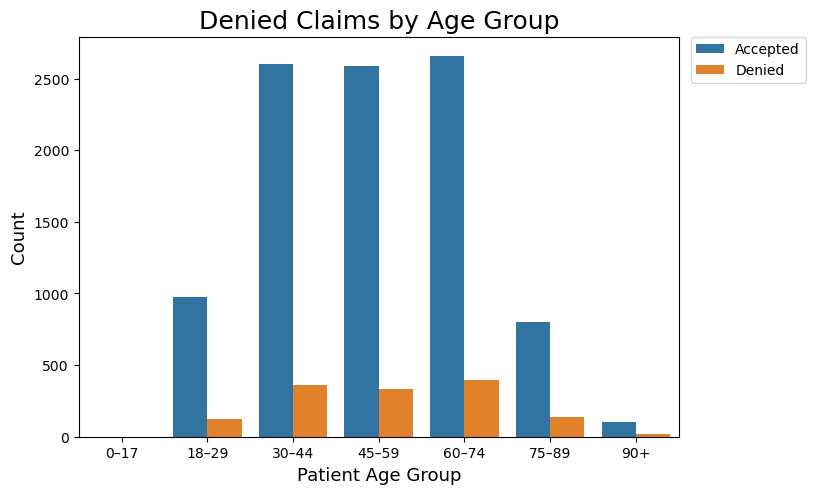

In [89]:
# Age vs. Denied

# Bin patient age
bins = [0, 18, 30, 45, 60, 75, 90, 120]
labels = ['0–17', '18–29', '30–44', '45–59', '60–74', '75–89', '90+']
claims_denials_appt['age_group'] = pd.cut(claims_denials_appt['patient_age'], bins=bins, labels=labels, right=False)

# Plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data=claims_denials_appt, x='age_group', hue='Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims by Age Group', fontsize=18)
ax.set_xlabel("Patient Age Group", fontsize=13)
ax.set_ylabel("Count", fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [90]:
# Count of claims by age group and denied status
age_denial_counts = (
    claims_denials_appt
    .groupby(['age_group', 'Denied'])
    .size()
    .reset_index(name='count')
)

# Display the result
print(age_denial_counts)

   age_group  Denied  count
0       0–17       0      0
1       0–17       1      0
2      18–29       0    973
3      18–29       1    122
4      30–44       0   2602
5      30–44       1    359
6      45–59       0   2587
7      45–59       1    330
8      60–74       0   2659
9      60–74       1    395
10     75–89       0    799
11     75–89       1    140
12       90+       0    106
13       90+       1     21


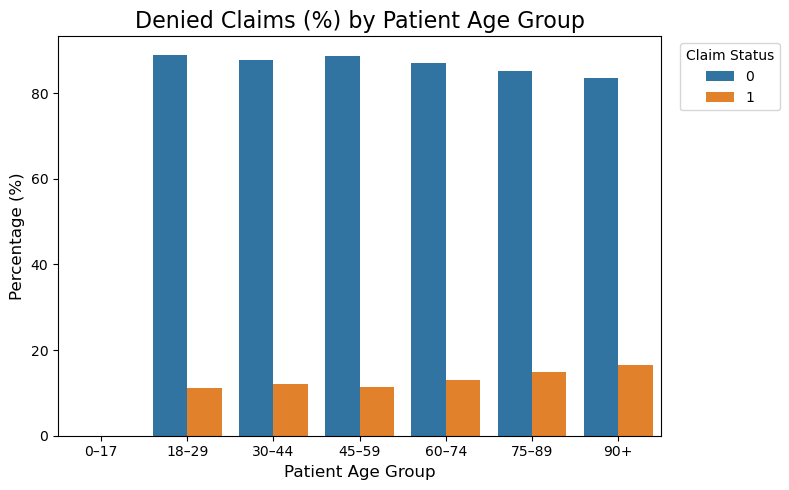

In [91]:
# Visualize by % Denied Claims

# Calculate counts and percentages
age_denial_pct = (
    claims_denials_appt
    .groupby(['age_group', 'Denied'])
    .size()
    .reset_index(name='count')
)

# Use transform instead of apply to avoid index mismatch
age_denial_pct['percent'] = (
    age_denial_pct['count'] / age_denial_pct.groupby('age_group')['count'].transform('sum') * 100
)

# Relabel Denied column to 'Accepted' and 'Denied' for legend clarity
age_denial_pct['Claim_Status'] = age_denial_pct['Denied'].map({0: 'Accepted', 1: 'Denied'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=age_denial_pct, x='age_group', y='percent', hue='Denied')
plt.title('Denied Claims (%) by Patient Age Group', fontsize=16)
plt.xlabel('Patient Age Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Claim Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [92]:
# Drop age_group column created for visualization
claims_denials_appt.drop(columns = ['age_group'], inplace = True)

<Axes: xlabel='Denied', ylabel='patient_age'>

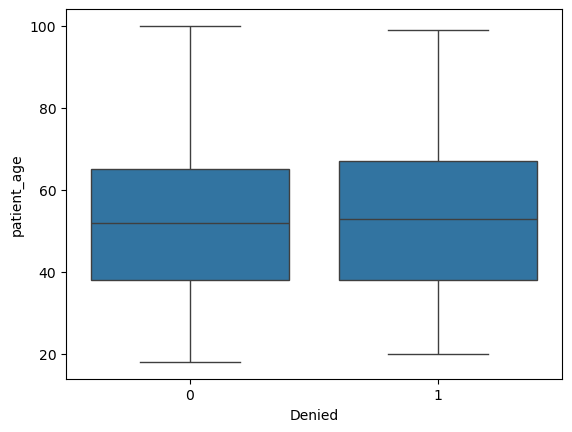

In [93]:
sns.boxplot(data=claims_denials_appt, x='Denied', y='patient_age')

/var/folders/rb/hbq90lbj0m705wt5bbtwzdl40000gn/T/ipykernel_47362/3314411787.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


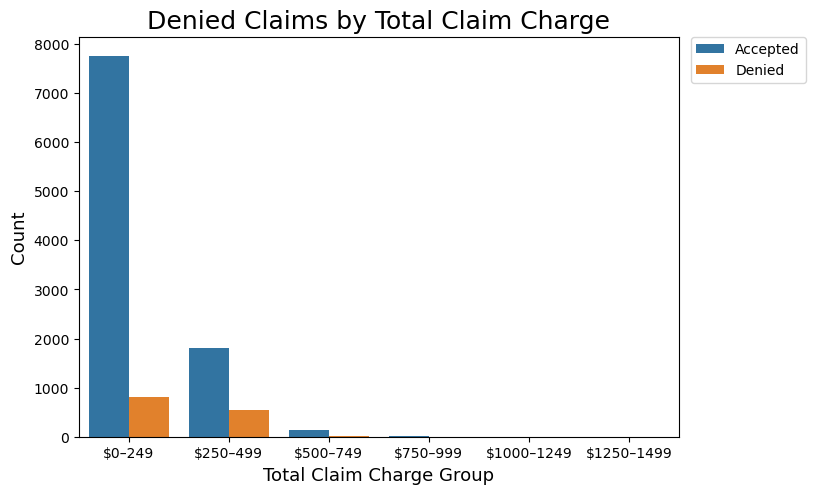

In [94]:
# Total Claim Charge vs. Denied

# Bin total charge within the $0–$1500 range
bins = [0, 250, 500, 750, 1000, 1250, 1500]
labels = ['$0–249', '$250–499', '$500–749', '$750–999', '$1000–1249', '$1250–1499']

claims_denials_appt['charge_group'] = pd.cut(claims_denials_appt['Total_Charge'], bins=bins, labels=labels, right=False)

# Plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data=claims_denials_appt, x='charge_group', hue='Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims by Total Claim Charge', fontsize=18)
ax.set_xlabel("Total Claim Charge Group", fontsize=13)
ax.set_ylabel("Count", fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

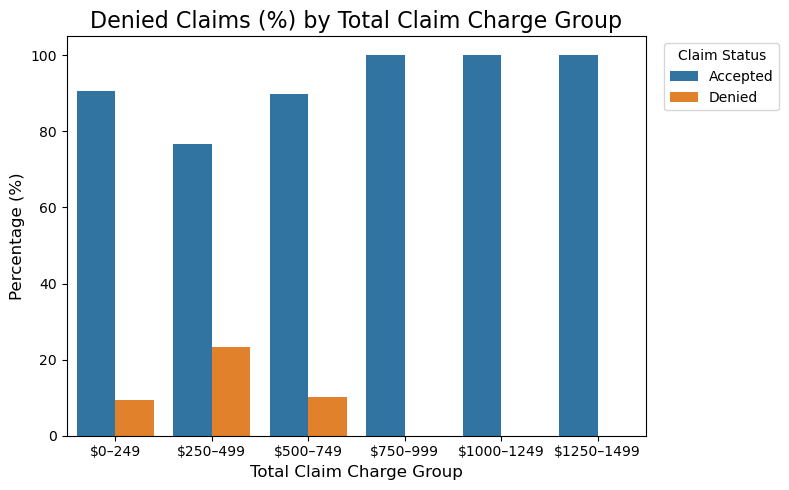

In [95]:
# Visualize by % Denied Claims

# Calculate counts and percentages
charge_denial_pct = (
    claims_denials_appt
    .groupby(['charge_group', 'Denied'])
    .size()
    .reset_index(name='count')
)

# Use transform instead of apply to avoid index mismatch
charge_denial_pct['percent'] = (
    charge_denial_pct['count'] / charge_denial_pct.groupby('charge_group')['count'].transform('sum') * 100
)

# Relabel Denied column to 'Accepted' and 'Denied' for legend clarity
charge_denial_pct['Claim_Status'] = charge_denial_pct['Denied'].map({0: 'Accepted', 1: 'Denied'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=charge_denial_pct, x='charge_group', y='percent', hue='Claim_Status')
plt.title('Denied Claims (%) by Total Claim Charge Group', fontsize=16)
plt.xlabel('Total Claim Charge Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Claim Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [96]:
# Drop charge_group column created for visualization
claims_denials_appt.drop(columns=['charge_group'], inplace=True)

<Axes: xlabel='Denied', ylabel='Total_Charge'>

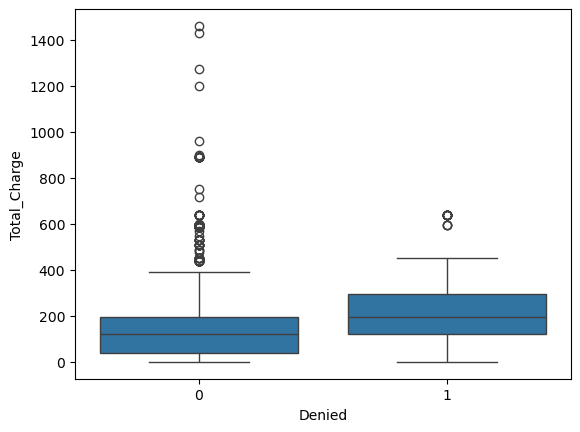

In [97]:
sns.boxplot(data=claims_denials_appt, x='Denied', y='Total_Charge')

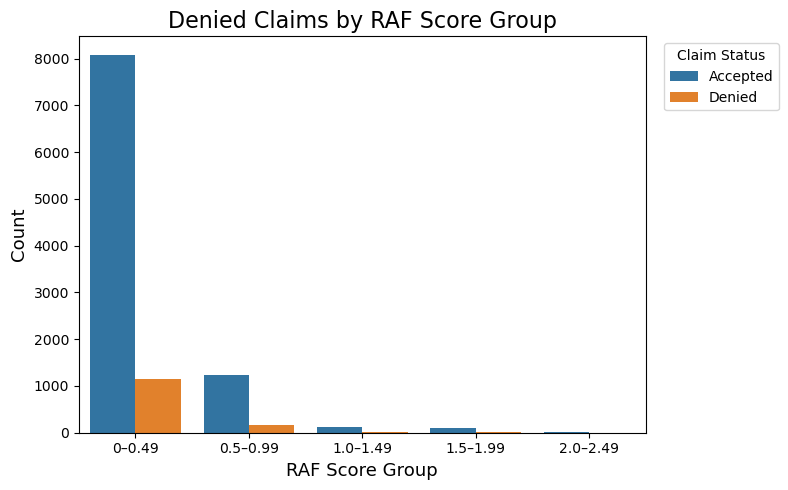

In [98]:
# RAF Score vs. Denied

# Step 1: Create bins and labels
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
labels = ['0–0.49', '0.5–0.99', '1.0–1.49', '1.5–1.99', '2.0–2.49']

# Step 2: Bin RAF_score
claims_denials_appt['raf_group'] = pd.cut(claims_denials_appt['RAF_score'], bins=bins, labels=labels, right=False)

# Step 3: Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=claims_denials_appt, x='raf_group', hue='Denied')
plt.title('Denied Claims by RAF Score Group', fontsize=16)
plt.xlabel('RAF Score Group', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend(title='Claim Status', labels=['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

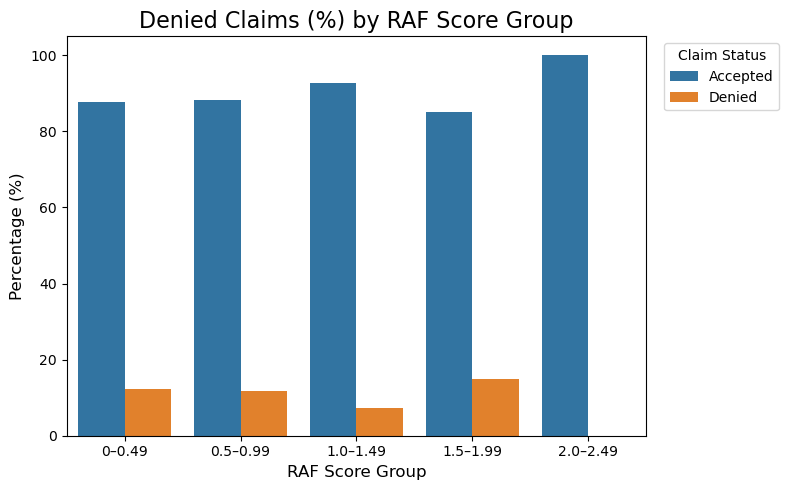

In [99]:
# Visualize RAF Score by % Denied Claims

# Calculate counts and percentages
raf_denial_pct = (
    claims_denials_appt
    .groupby(['raf_group', 'Denied'])
    .size()
    .reset_index(name='count')
)

# Use transform instead of apply to avoid index mismatch
raf_denial_pct['percent'] = (
    raf_denial_pct['count'] / raf_denial_pct.groupby('raf_group')['count'].transform('sum') * 100
)

# Relabel Denied column to 'Accepted' and 'Denied' for legend clarity
raf_denial_pct['Claim_Status'] = raf_denial_pct['Denied'].map({0: 'Accepted', 1: 'Denied'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=raf_denial_pct, x='raf_group', y='percent', hue='Claim_Status')
plt.title('Denied Claims (%) by RAF Score Group', fontsize=16)
plt.xlabel('RAF Score Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Claim Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [100]:
# Drop raf_group column created for visualization
claims_denials_appt.drop(columns=['raf_group'], inplace=True)

<Axes: xlabel='Denied', ylabel='RAF_score'>

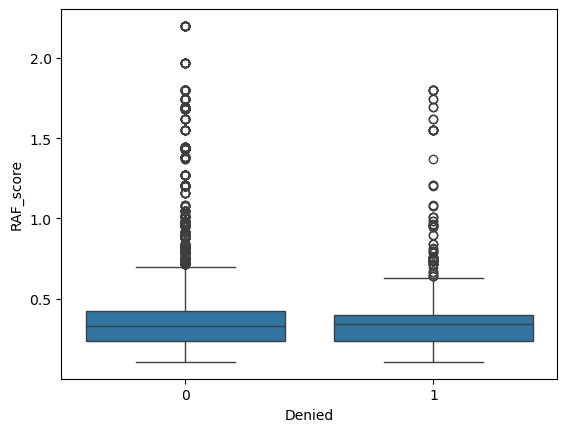

In [101]:
sns.boxplot(data=claims_denials_appt, x='Denied', y='RAF_score')

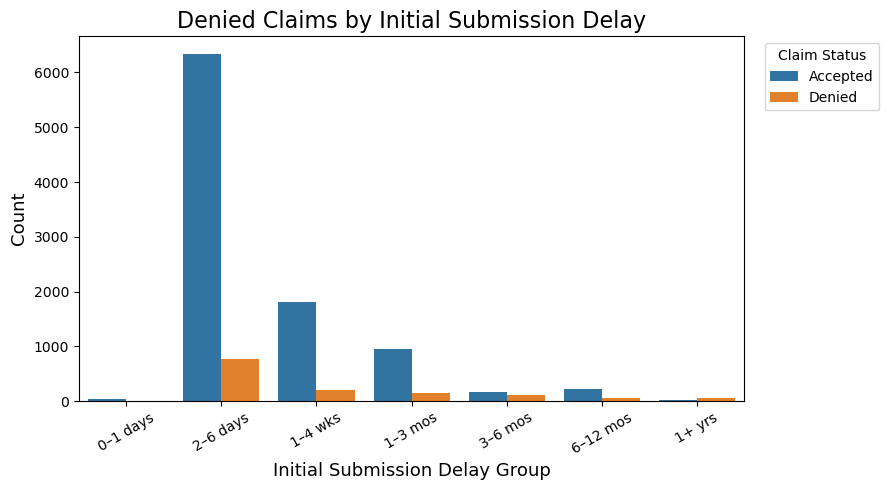

In [102]:
# Initial Submission Delay vs. Denied

# Step 1: Define bins and labels
bins = [0, 1, 7, 30, 90, 180, 365, 2600]
labels = ['0–1 days', '2–6 days', '1–4 wks', '1–3 mos', '3–6 mos', '6–12 mos', '1+ yrs']

# Step 2: Bin the delay values
claims_denials_appt['submission_delay_group'] = pd.cut(
    claims_denials_appt['Initial_Submission_Delay'], 
    bins=bins, 
    labels=labels, 
    right=False
)

# Step 3: Plot
plt.figure(figsize=(9, 5))
sns.countplot(data=claims_denials_appt, x='submission_delay_group', hue='Denied')
plt.title('Denied Claims by Initial Submission Delay', fontsize=16)
plt.xlabel('Initial Submission Delay Group', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=30)
plt.legend(title='Claim Status', labels=['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

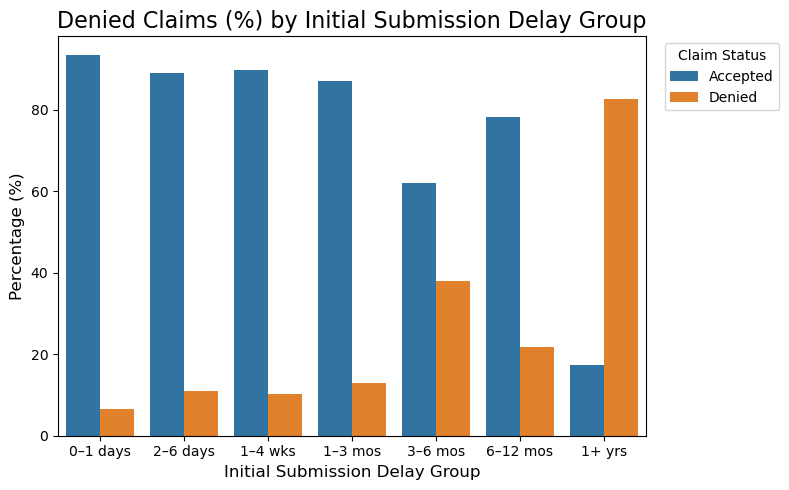

In [103]:
# Visualize Initial Submission Delay by % Denied Claims

# Calculate counts and percentages
isubmission_denial_pct = (
    claims_denials_appt
    .groupby(['submission_delay_group', 'Denied'])
    .size()
    .reset_index(name='count')
)

# Use transform instead of apply to avoid index mismatch
isubmission_denial_pct['percent'] = (
    isubmission_denial_pct['count'] / isubmission_denial_pct.groupby('submission_delay_group')['count'].transform('sum') * 100
)

# Relabel Denied column to 'Accepted' and 'Denied' for legend clarity
isubmission_denial_pct['Claim_Status'] = isubmission_denial_pct['Denied'].map({0: 'Accepted', 1: 'Denied'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=isubmission_denial_pct, x='submission_delay_group', y='percent', hue='Claim_Status')
plt.title('Denied Claims (%) by Initial Submission Delay Group', fontsize=16)
plt.xlabel('Initial Submission Delay Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Claim Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [104]:
# Drop submission_delay_group column created for visualization
claims_denials_appt.drop(columns=['submission_delay_group'], inplace=True)

<Axes: xlabel='Denied', ylabel='Initial_Submission_Delay'>

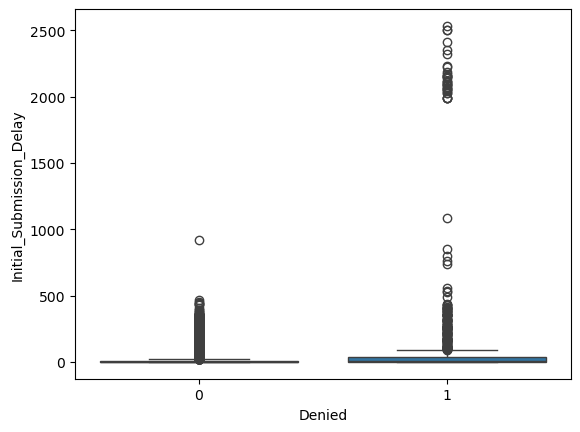

In [105]:
sns.boxplot(data=claims_denials_appt, x='Denied', y='Initial_Submission_Delay')

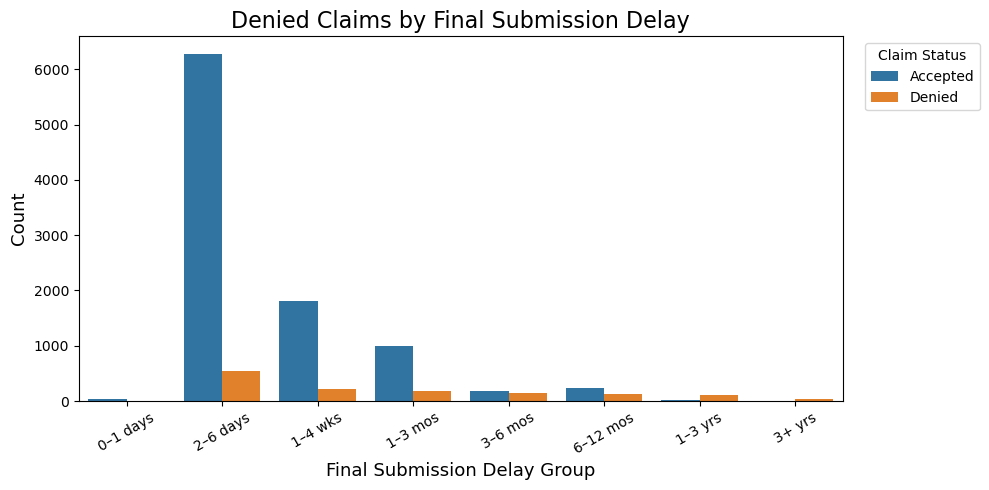

In [106]:
# Final Submission Delay vs. Denied

# Step 1: Define bins and labels
bins = [0, 1, 7, 30, 90, 180, 365, 1095, 3001]  # 1095 ≈ 3 years
labels = ['0–1 days', '2–6 days', '1–4 wks', '1–3 mos', '3–6 mos', '6–12 mos', '1–3 yrs', '3+ yrs']

# Step 2: Bin the delay values
claims_denials_appt['final_submission_delay_group'] = pd.cut(
    claims_denials_appt['Final_Submission_Delay'],
    bins=bins,
    labels=labels,
    right=False
)

# Step 3: Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=claims_denials_appt, x='final_submission_delay_group', hue='Denied')
plt.title('Denied Claims by Final Submission Delay', fontsize=16)
plt.xlabel('Final Submission Delay Group', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=30)
plt.legend(title='Claim Status', labels=['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

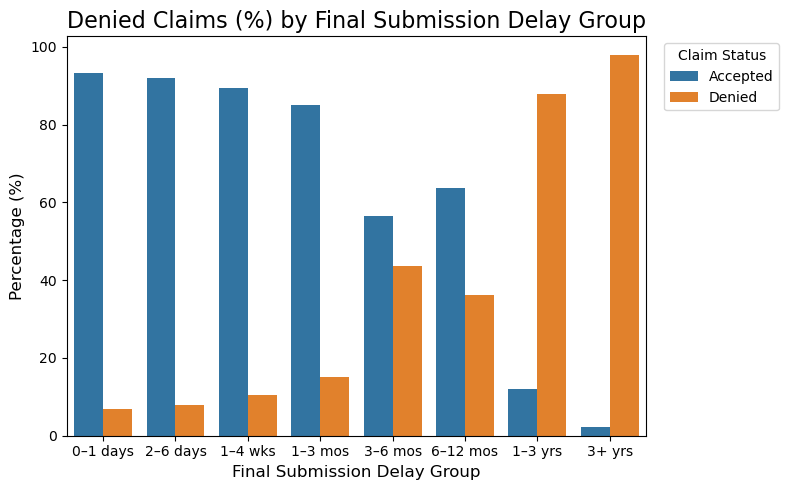

In [107]:
# Visualize Final Submission Delay by % Denied Claims

# Calculate counts and percentages
fsubmission_denial_pct = (
    claims_denials_appt
    .groupby(['final_submission_delay_group', 'Denied'])
    .size()
    .reset_index(name='count')
)

# Use transform instead of apply to avoid index mismatch
fsubmission_denial_pct['percent'] = (
    fsubmission_denial_pct['count'] / fsubmission_denial_pct.groupby('final_submission_delay_group')['count'].transform('sum') * 100
)

# Relabel Denied column to 'Accepted' and 'Denied' for legend clarity
fsubmission_denial_pct['Claim_Status'] = fsubmission_denial_pct['Denied'].map({0: 'Accepted', 1: 'Denied'})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=fsubmission_denial_pct, x='final_submission_delay_group', y='percent', hue='Claim_Status')
plt.title('Denied Claims (%) by Final Submission Delay Group', fontsize=16)
plt.xlabel('Final Submission Delay Group', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Claim Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [108]:
# Drop final_submission_delay_group column created for visualization
claims_denials_appt.drop(columns=['final_submission_delay_group'], inplace=True)

<Axes: xlabel='Denied', ylabel='Final_Submission_Delay'>

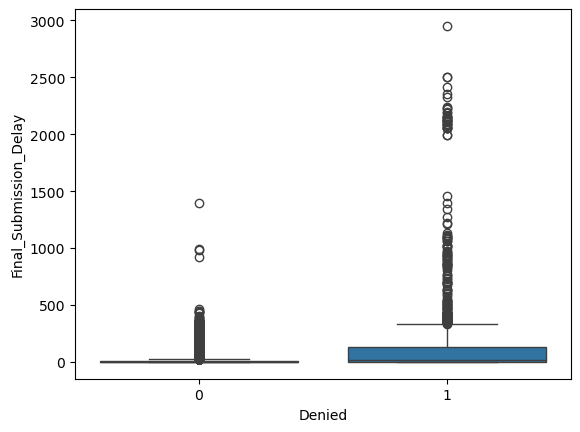

In [109]:
sns.boxplot(data=claims_denials_appt, x='Denied', y='Final_Submission_Delay')

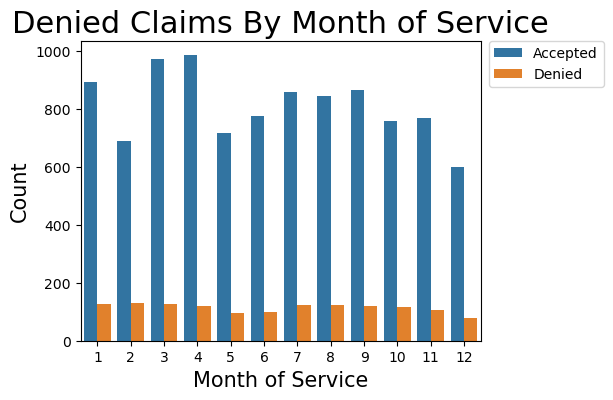

In [110]:
# Month of Service vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'Month_Service', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By Month of Service', fontsize=22)
ax.set_xlabel("Month of Service", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

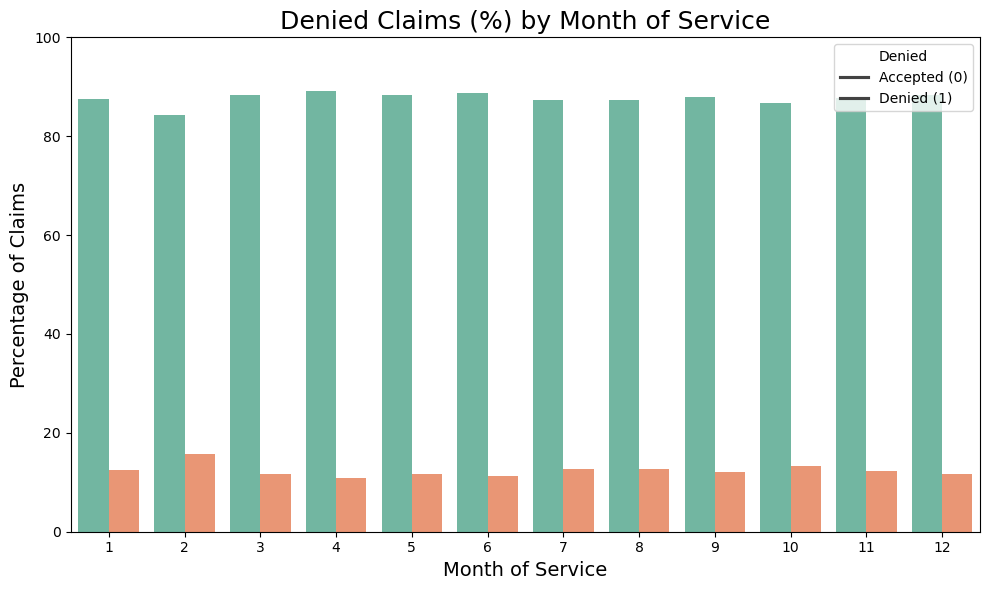

In [111]:
# 1. Compute percentage per Month_Service and Denied
plot_data = (
    claims_denials_appt
    .groupby(['Month_Service', 'Denied'])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to get percent within each Month_Service
plot_data['percent'] = (
    plot_data.groupby('Month_Service')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Month_Service', y='percent', hue='Denied', palette='Set2')

# 4. Format
plt.title('Denied Claims (%) by Month of Service', fontsize=18)
plt.xlabel('Month of Service', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.legend(title='Denied', labels=['Accepted (0)', 'Denied (1)'], loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

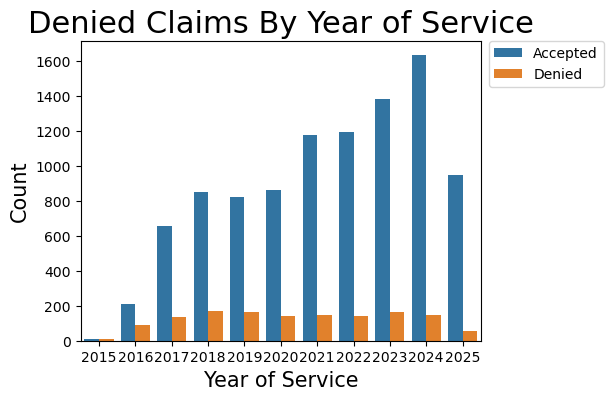

In [112]:
# Year of Service vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'Year_Service', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By Year of Service', fontsize=22)
ax.set_xlabel("Year of Service", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

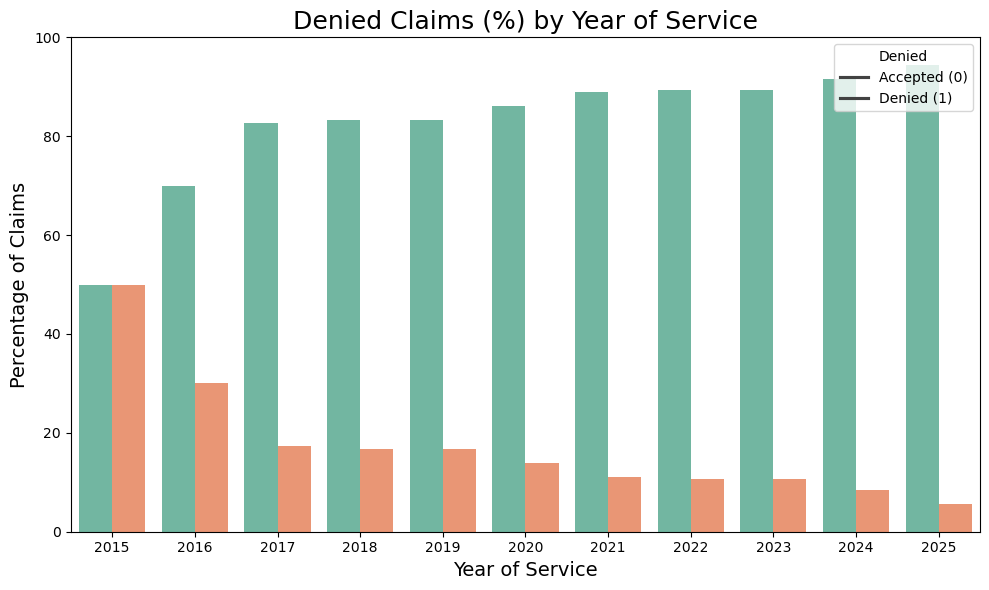

In [113]:
# 1. Compute percentage per Year_Service and Denied
plot_data = (
    claims_denials_appt
    .groupby(['Year_Service', 'Denied'])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to get percent within each Year_Service
plot_data['percent'] = (
    plot_data.groupby('Year_Service')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Year_Service', y='percent', hue='Denied', palette='Set2')

# 4. Format
plt.title('Denied Claims (%) by Year of Service', fontsize=18)
plt.xlabel('Year of Service', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.legend(title='Denied', labels=['Accepted (0)', 'Denied (1)'], loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

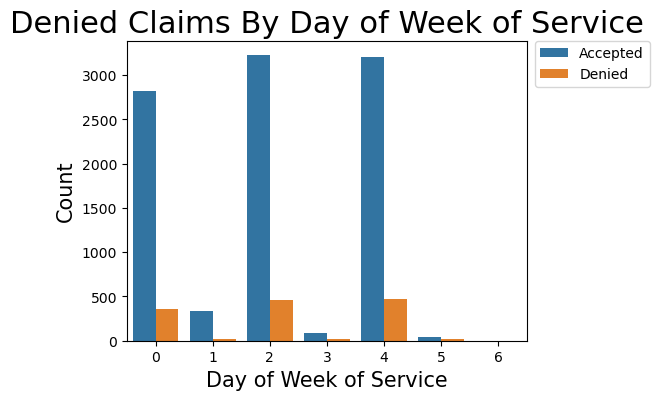

In [114]:
# Day of Week of Service vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'Day_of_Week_Service', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By Day of Week of Service', fontsize=22)
ax.set_xlabel("Day of Week of Service", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

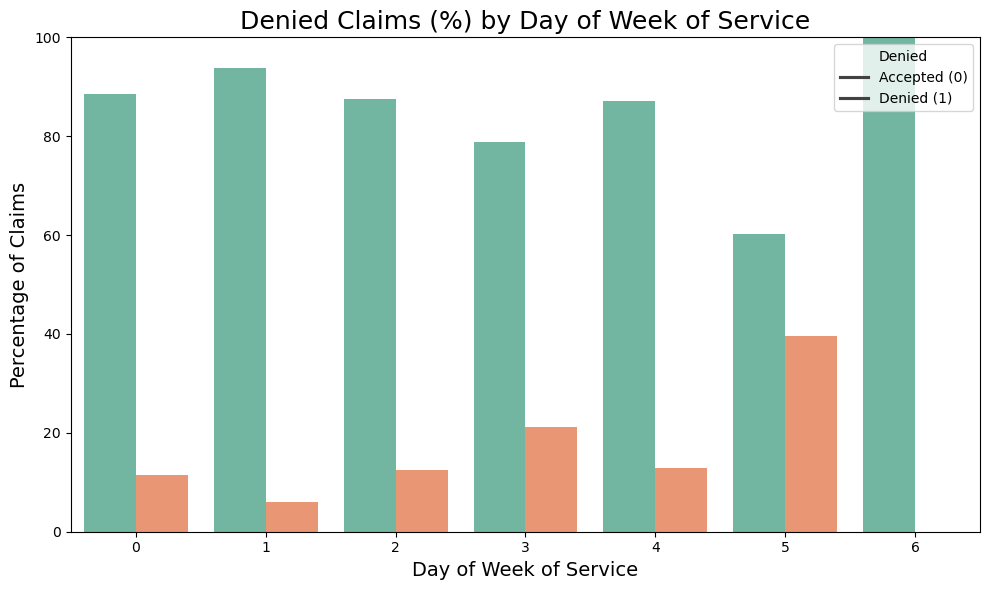

In [115]:
# 1. Compute percentage per Day_of_Week_Service and Denied
plot_data = (
    claims_denials_appt
    .groupby(['Day_of_Week_Service', 'Denied'])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to get percent within each Day_of_Week_Service
plot_data['percent'] = (
    plot_data.groupby('Day_of_Week_Service')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# 3. Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Day_of_Week_Service', y='percent', hue='Denied', palette='Set2')

# 4. Format
plt.title('Denied Claims (%) by Day of Week of Service', fontsize=18)
plt.xlabel('Day of Week of Service', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.legend(title='Denied', labels=['Accepted (0)', 'Denied (1)'], loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [116]:
# Save Dataset to Computer for later
claims_denials_appt.to_excel('claims_denials_appt.xlsx', index=False)

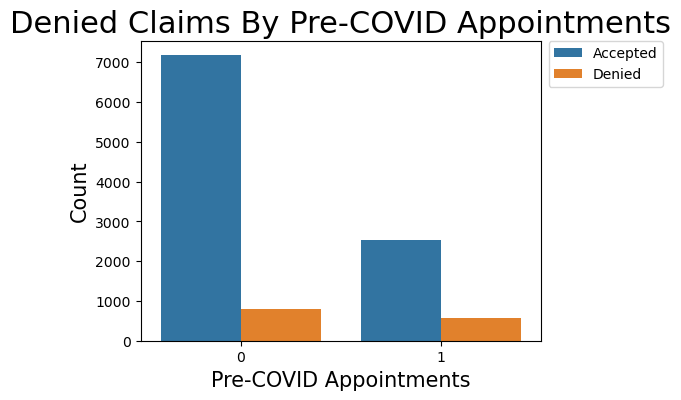

In [117]:
# pre_COVID vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'pre_COVID', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By Pre-COVID Appointments', fontsize=22)
ax.set_xlabel("Pre-COVID Appointments", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

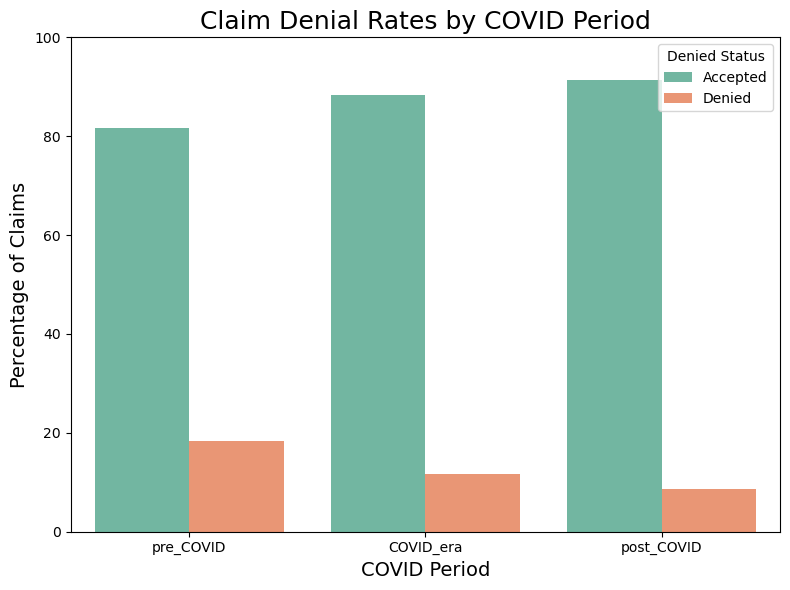

In [118]:
# melt the three binary COVID columns into one column:
claims_denials_appt_melted = claims_denials_appt.melt(
    id_vars='Denied',
    value_vars=['pre_COVID', 'COVID_era', 'post_COVID'],
    var_name='COVID_period',
    value_name='is_period'
)

# Filter to only rows where is_period == 1 (i.e., match the actual period):
claims_denials_appt_period = claims_denials_appt_melted[claims_denials_appt_melted['is_period'] == 1]

plot_data = (
    claims_denials_appt_period
    .groupby(['COVID_period', 'Denied'])
    .size()
    .reset_index(name='count')
)

# Group and calculate percentages:
plot_data['percent'] = (
    plot_data.groupby('COVID_period')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# Ensure category order for COVID period
plot_data['COVID_period'] = pd.Categorical(
    plot_data['COVID_period'],
    categories=['pre_COVID', 'COVID_era', 'post_COVID'],
    ordered=True
)

# Define clear labels for Denied status
denied_labels = {0: 'Accepted', 1: 'Denied'}

# Plot
plt.figure(figsize=(8, 6))
bar = sns.barplot(
    data=plot_data,
    x='COVID_period',
    y='percent',
    hue='Denied',
    palette='Set2'
)

# Set legend with automatic color matching
handles, labels = bar.get_legend_handles_labels()
new_labels = [denied_labels[int(lbl)] for lbl in labels]
bar.legend(handles, new_labels, title='Denied Status', loc='upper right')

# Labels and formatting
plt.title('Claim Denial Rates by COVID Period', fontsize=18)
plt.xlabel('COVID Period', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [119]:
claims_denials_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   De_ID                           11093 non-null  object 
 1   Total_Charge                    11093 non-null  float64
 2   proccode                        11093 non-null  object 
 3   icd10claimdiagcode01            11093 non-null  object 
 4   icd10claimdiagcode02            10042 non-null  object 
 5   icd10claimdiagcode03            8760 non-null   object 
 6   icd10claimdiagcode04            7448 non-null   object 
 7   icd10claimdiagcode05            6242 non-null   object 
 8   icd10claimdiagcode06            5332 non-null   object 
 9   icd10claimdiagcode07            4544 non-null   object 
 10  icd10claimdiagcode08            3803 non-null   object 
 11  icd10claimdiagcode09            3136 non-null   object 
 12  icd10claimdiagcode10            

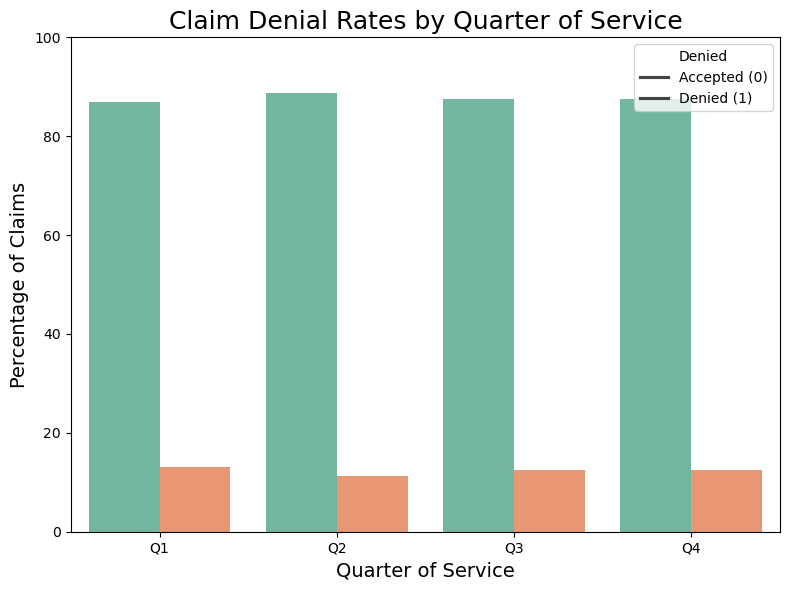

In [120]:
# Quarter of Service vs. Denied

plot_data = (
    claims_denials_appt
    .groupby(['Quarter_Service', 'Denied'])
    .size()
    .reset_index(name='count')
)

plot_data['percent'] = (
    plot_data.groupby('Quarter_Service')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# Set correct order for quarters
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
plot_data['Quarter_Service'] = pd.Categorical(
    plot_data['Quarter_Service'],
    categories=quarter_order,
    ordered=True
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=plot_data,
    x='Quarter_Service',
    y='percent',
    hue='Denied',
    palette='Set2'
)

plt.title('Claim Denial Rates by Quarter of Service', fontsize=18)
plt.xlabel('Quarter of Service', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.ylim(0, 100)
plt.legend(title='Denied', labels=['Accepted (0)', 'Denied (1)'], loc='upper right')
plt.tight_layout()
plt.show()


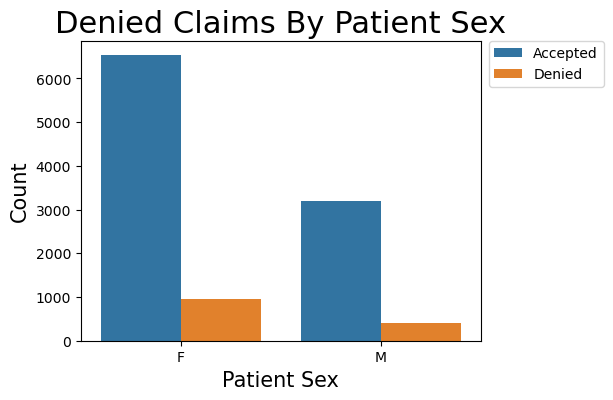

In [121]:
# Patient Sex vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'patientsex', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By Patient Sex', fontsize=22)
ax.set_xlabel("Patient Sex", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

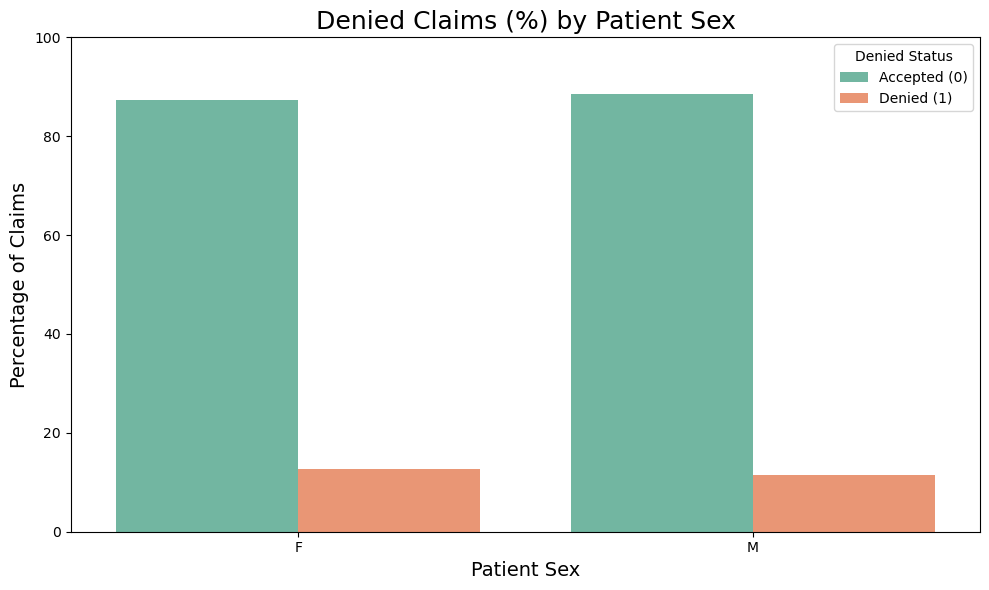

In [122]:
# 1. Compute percentage per patientsex and Denied
plot_data = (
    claims_denials_appt
    .groupby(['patientsex', 'Denied'])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to get percent within each patientsex
plot_data['percent'] = (
    plot_data.groupby('patientsex')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# 3. Plot
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=plot_data,
    x='patientsex',
    y='percent',
    hue='Denied',
    palette='Set2'
)

# 4. Format
plt.title('Denied Claims (%) by Patient Sex', fontsize=18)
plt.xlabel('Patient Sex', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.ylim(0, 100)

# 5. Fix legend: match colors with correct labels
handles, labels = bar.get_legend_handles_labels()
denied_labels = {0: 'Accepted (0)', 1: 'Denied (1)'}
updated_labels = [denied_labels[int(float(l))] for l in labels]
bar.legend(handles, updated_labels, title='Denied Status', loc='upper right')

plt.tight_layout()
plt.show()

In [123]:
print(plot_data)

  patientsex  Denied  count    percent
0          F       0   6536  87.263017
1          F       1    954  12.736983
2          M       0   3190  88.537330
3          M       1    413  11.462670


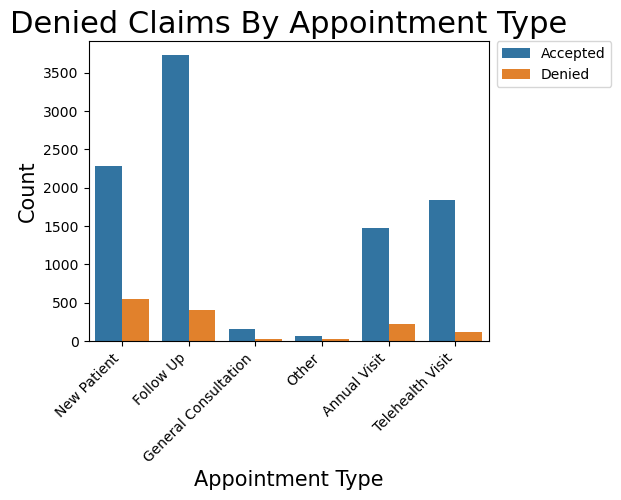

In [124]:
# Appt Type vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'appttype', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By Appointment Type', fontsize=22)
ax.set_xlabel("Appointment Type", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
plt.xticks(rotation=45, ha='right');

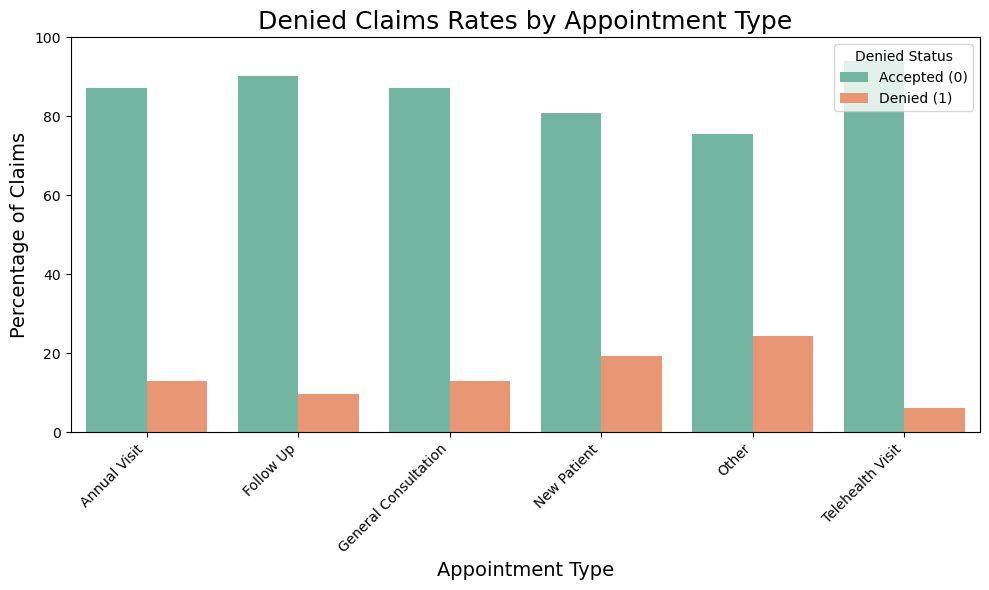

In [125]:
# 1. Compute percentage per appttype and Denied
plot_data = (
    claims_denials_appt
    .groupby(['appttype', 'Denied'])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to get percent within each appttype
plot_data['percent'] = (
    plot_data.groupby('appttype')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# 3. Plot
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=plot_data,
    x='appttype',
    y='percent',
    hue='Denied',
    palette='Set2'
)

# 4. Format
plt.title('Denied Claims Rates by Appointment Type', fontsize=18)
plt.xlabel('Appointment Type', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right') 

# 5. Fix legend: match colors with correct labels
handles, labels = bar.get_legend_handles_labels()
denied_labels = {0: 'Accepted (0)', 1: 'Denied (1)'}
updated_labels = [denied_labels[int(float(l))] for l in labels]
bar.legend(handles, updated_labels, title='Denied Status', loc='upper right')

plt.tight_layout()
plt.show()

In [126]:
print(plot_data)

                appttype  Denied  count    percent
0           Annual Visit       0   1469  87.077653
1           Annual Visit       1    218  12.922347
2              Follow Up       0   3725  90.281144
3              Follow Up       1    401   9.718856
4   General Consultation       0    155  87.078652
5   General Consultation       1     23  12.921348
6            New Patient       0   2288  80.733945
7            New Patient       1    546  19.266055
8                  Other       0     71  75.531915
9                  Other       1     23  24.468085
10      Telehealth Visit       0   1842  93.883792
11      Telehealth Visit       1    120   6.116208


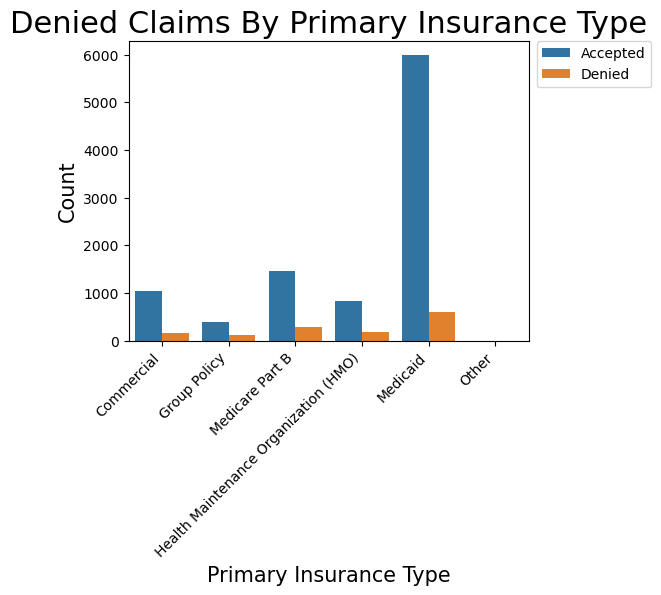

In [127]:
# Primary Insurance Type vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'patient_primary_ins_pkg_type', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By Primary Insurance Type', fontsize=22)
ax.set_xlabel("Primary Insurance Type", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
plt.xticks(rotation=45, ha='right');

In [128]:
# Create a frequency table of counts
counts_table = (
    claims_denials_appt
    .groupby(['patient_primary_ins_pkg_type', 'Denied'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Display the table
counts_table

,patient_primary_ins_pkg_type,Denied,count
6,Medicaid,0,5993
8,Medicare Part B,0,1463
0,Commercial,0,1036
4,Health Maintenance Organization (HMO),0,829
7,Medicaid,1,597
2,Group Policy,0,404
9,Medicare Part B,1,293
5,Health Maintenance Organization (HMO),1,187
1,Commercial,1,161
3,Group Policy,1,129


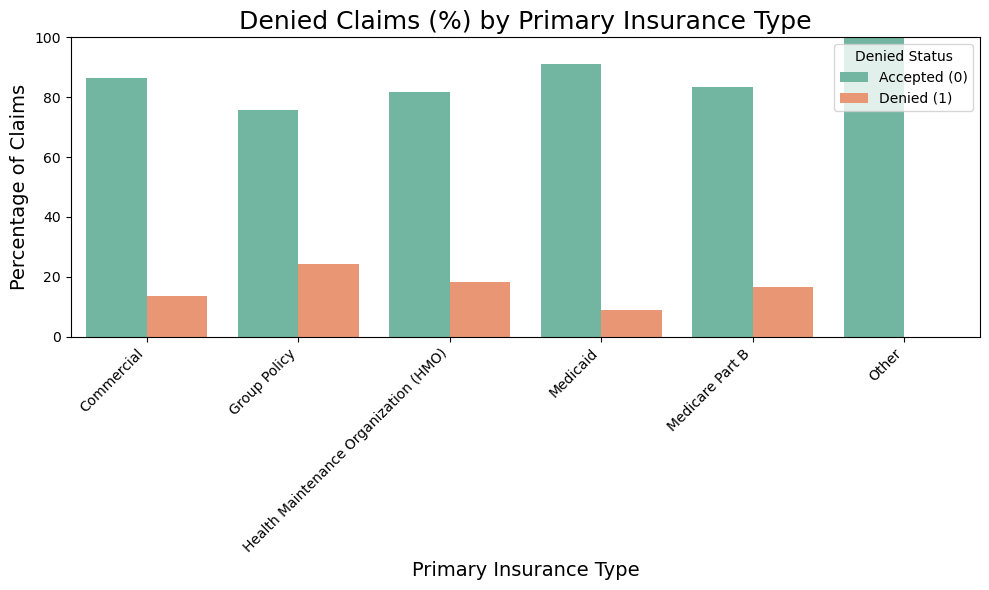

In [129]:
# 1. Compute percentage per patient_primary_ins_pkg_type and Denied
plot_data = (
    claims_denials_appt
    .groupby(['patient_primary_ins_pkg_type', 'Denied'])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to get percent within each patient_primary_ins_pkg_type
plot_data['percent'] = (
    plot_data.groupby('patient_primary_ins_pkg_type')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# 3. Plot
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=plot_data,
    x='patient_primary_ins_pkg_type',
    y='percent',
    hue='Denied',
    palette='Set2'
)

# 4. Format
plt.title('Denied Claims (%) by Primary Insurance Type', fontsize=18)
plt.xlabel('Primary Insurance Type', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right') 

# 5. Fix legend: match colors with correct labels
handles, labels = bar.get_legend_handles_labels()
denied_labels = {0: 'Accepted (0)', 1: 'Denied (1)'}
updated_labels = [denied_labels[int(float(l))] for l in labels]
bar.legend(handles, updated_labels, title='Denied Status', loc='upper right')

plt.tight_layout()
plt.show()

In [130]:
print(plot_data)

             patient_primary_ins_pkg_type  Denied  count     percent
0                              Commercial       0   1036   86.549708
1                              Commercial       1    161   13.450292
2                            Group Policy       0    404   75.797373
3                            Group Policy       1    129   24.202627
4   Health Maintenance Organization (HMO)       0    829   81.594488
5   Health Maintenance Organization (HMO)       1    187   18.405512
6                                Medicaid       0   5993   90.940819
7                                Medicaid       1    597    9.059181
8                         Medicare Part B       0   1463   83.314351
9                         Medicare Part B       1    293   16.685649
10                                  Other       0      1  100.000000


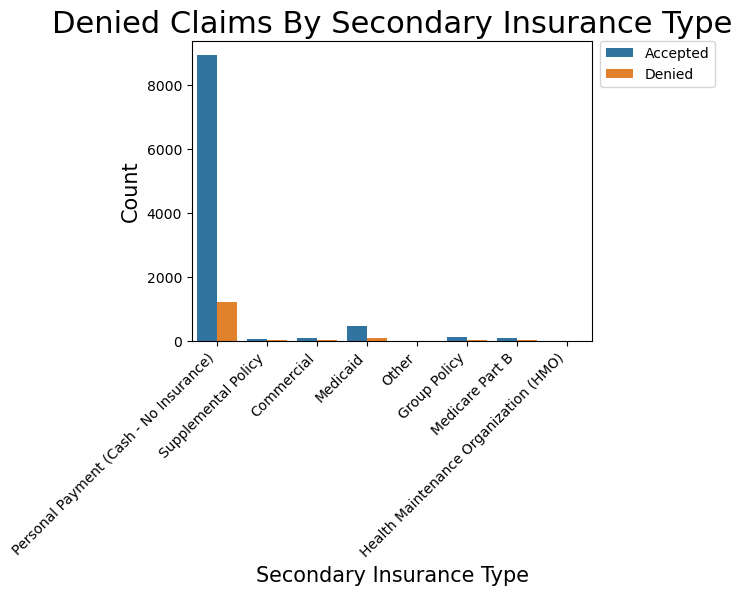

In [131]:
# Seconday Insurance Type vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'patient_secondary_ins_pkg_type', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By Secondary Insurance Type', fontsize=22)
ax.set_xlabel("Secondary Insurance Type", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
plt.xticks(rotation=45, ha='right');

In [132]:
# Create a frequency table of counts
counts_table = (
    claims_denials_appt
    .groupby(['patient_secondary_ins_pkg_type', 'Denied'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Display the table
counts_table

,patient_secondary_ins_pkg_type,Denied,count
11,Personal Payment (Cash - No Insurance),0,8927
12,Personal Payment (Cash - No Insurance),1,1211
6,Medicaid,0,449
2,Group Policy,0,104
8,Medicare Part B,0,97
0,Commercial,0,78
7,Medicaid,1,75
13,Supplemental Policy,0,67
9,Medicare Part B,1,32
1,Commercial,1,16


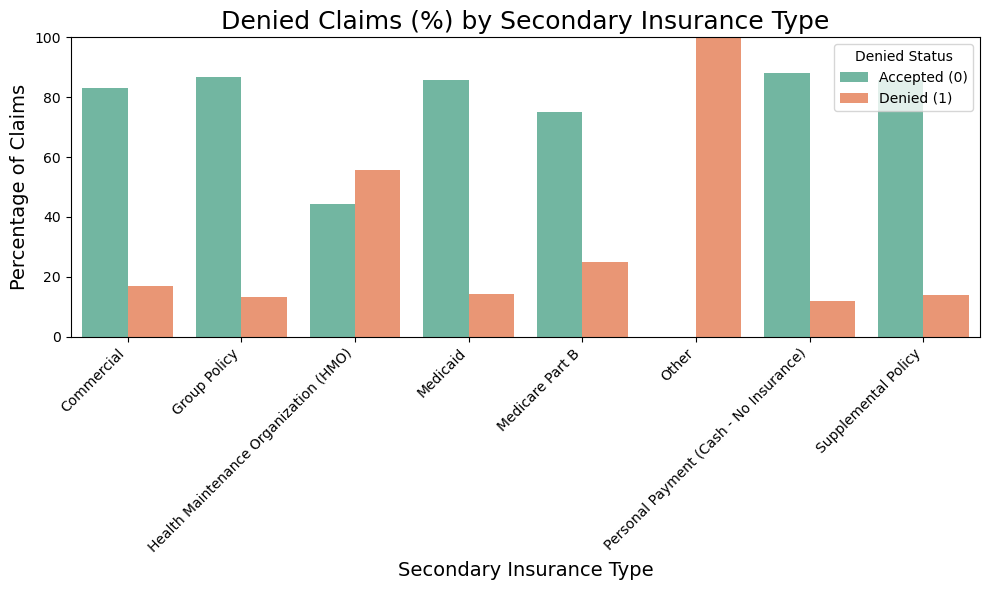

In [133]:
# 1. Compute percentage per patient_primary_ins_pkg_type and Denied
plot_data = (
    claims_denials_appt
    .groupby(['patient_secondary_ins_pkg_type', 'Denied'])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to get percent within each patient_primary_ins_pkg_type
plot_data['percent'] = (
    plot_data.groupby('patient_secondary_ins_pkg_type')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# 3. Plot
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=plot_data,
    x='patient_secondary_ins_pkg_type',
    y='percent',
    hue='Denied',
    palette='Set2'
)

# 4. Format
plt.title('Denied Claims (%) by Secondary Insurance Type', fontsize=18)
plt.xlabel('Secondary Insurance Type', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right') 

# 5. Fix legend: match colors with correct labels
handles, labels = bar.get_legend_handles_labels()
denied_labels = {0: 'Accepted (0)', 1: 'Denied (1)'}
updated_labels = [denied_labels[int(float(l))] for l in labels]
bar.legend(handles, updated_labels, title='Denied Status', loc='upper right')

plt.tight_layout()
plt.show()

### Feature Engineer New Column that Gives Count of Total Number of ICD10 codes Included for Each Claim Submission

In [134]:
# Feature Engineer a new column that gives count of total ICD10 codes included for each claim submission

# List all ICD code columns
icd_cols = [
    'icd10claimdiagcode01', 'icd10claimdiagcode02', 'icd10claimdiagcode03',
    'icd10claimdiagcode04', 'icd10claimdiagcode05', 'icd10claimdiagcode06',
    'icd10claimdiagcode07', 'icd10claimdiagcode08', 'icd10claimdiagcode09',
    'icd10claimdiagcode10', 'icd10claimdiagcode11', 'icd10claimdiagcode12'
]

# Count non-null ICD codes per row
claims_denials_appt['icd_code_count'] = claims_denials_appt[icd_cols].notna().sum(axis=1)
claims_denials_appt.head()

,De_ID,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,Quarter_Service,pre_COVID,COVID_era,post_COVID,icd_code_count
0,CLM03667,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,0,NaN,NaN,10,2015,3,148.0,148.0,Q4,1,0,0,3
1,CLM01748,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1,NaN,NaN,10,2015,2,167.0,170.0,Q4,1,0,0,4
2,CLM03701,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,10,2015,2,120.0,120.0,Q4,1,0,0,3
3,CLM00864,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1,NaN,NaN,10,2015,4,193.0,193.0,Q4,1,0,0,3
4,CLM10664,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,11,2015,3,110.0,180.0,Q4,1,0,0,2


In [135]:
# See value counts for icd_code_count
claims_denials_appt.icd_code_count.value_counts()

icd_code_count
12    1537
3     1312
2     1282
4     1206
1     1051
5      910
6      788
7      741
8      667
9      588
11     506
10     505
Name: count, dtype: int64

Histogram of Month of Service


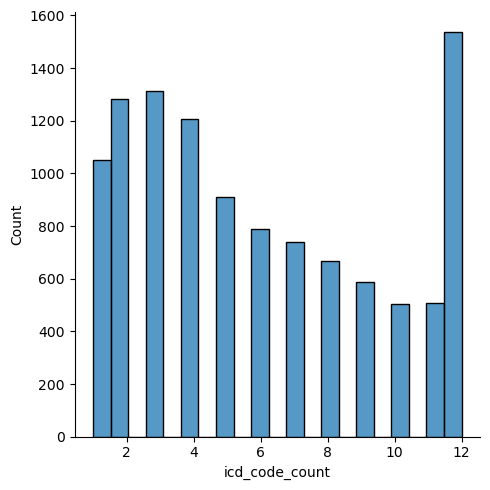

In [136]:
# Histogram of ICD Code Count
print('Histogram of Month of Service')
sns.displot(data=claims_denials_appt['icd_code_count'])
plt.show()

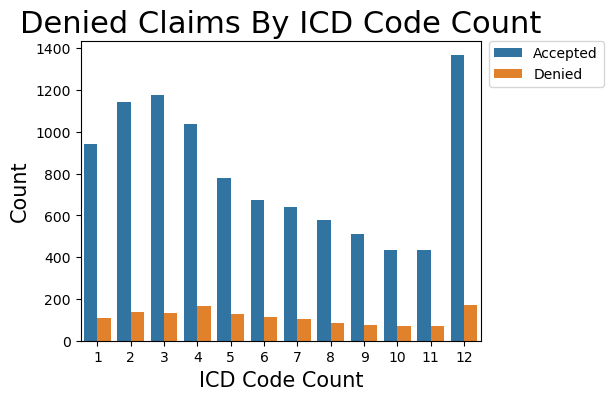

In [137]:
# ICD Code Count vs. Denied

fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = claims_denials_appt, x = 'icd_code_count', hue = 'Denied')
plt.legend(['Accepted', 'Denied'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Denied Claims By ICD Code Count', fontsize=22)
ax.set_xlabel("ICD Code Count", fontsize=15)
ax.set_ylabel("Count", fontsize=15);

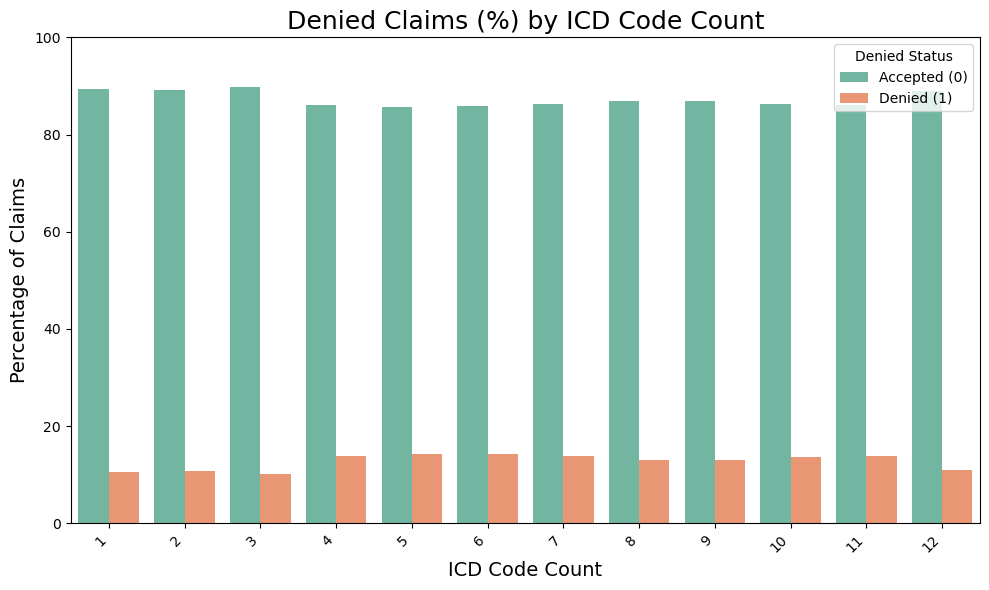

In [138]:
# 1. Compute percentage per icd_code_count and Denied
plot_data = (
    claims_denials_appt
    .groupby(['icd_code_count', 'Denied'])
    .size()
    .reset_index(name='count')
)

# 2. Normalize to get percent within each icd_code_count
plot_data['percent'] = (
    plot_data.groupby('icd_code_count')['count']
    .transform(lambda x: 100 * x / x.sum())
)

# 3. Plot
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=plot_data,
    x='icd_code_count',
    y='percent',
    hue='Denied',
    palette='Set2'
)

# 4. Format
plt.title('Denied Claims (%) by ICD Code Count', fontsize=18)
plt.xlabel('ICD Code Count', fontsize=14)
plt.ylabel('Percentage of Claims', fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right') 

# 5. Fix legend: match colors with correct labels
handles, labels = bar.get_legend_handles_labels()
denied_labels = {0: 'Accepted (0)', 1: 'Denied (1)'}
updated_labels = [denied_labels[int(float(l))] for l in labels]
bar.legend(handles, updated_labels, title='Denied Status', loc='upper right')

plt.tight_layout()
plt.show()

### Feature Engineering Procedure-Diagnosis Code Compatibility Variable

In [139]:
# Feature Engineer combination of Procedure Code & each ICD10 code

import numpy as np

for i in range(1, 13):
    icd_col = f'icd10claimdiagcode{str(i).zfill(2)}'
    new_col = f'proc_icd{i}_combo'
    claims_denials_appt[new_col] = np.where(
        claims_denials_appt[icd_col].notna(),
        claims_denials_appt['proccode'].astype(str) + '_' + claims_denials_appt[icd_col].astype(str),
        "None"
    )

claims_denials_appt.head()

,De_ID,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,Quarter_Service,pre_COVID,COVID_era,post_COVID,icd_code_count,proc_icd1_combo,proc_icd2_combo,proc_icd3_combo,proc_icd4_combo,proc_icd5_combo,proc_icd6_combo,proc_icd7_combo,proc_icd8_combo,proc_icd9_combo,proc_icd10_combo,proc_icd11_combo,proc_icd12_combo
0,CLM03667,637.36,99205,F411,F5105,R51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,0,NaN,NaN,10,2015,3,148.0,148.0,Q4,1,0,0,3,99205_F411,99205_F5105,99205_R51,None,None,None,None,None,None,None,None,None
1,CLM01748,637.36,99205,F413,F319,F909,F603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1,NaN,NaN,10,2015,2,167.0,170.0,Q4,1,0,0,4,99205_F413,99205_F319,99205_F909,99205_F603,None,None,None,None,None,None,None,None
2,CLM03701,637.36,99205,H8143,M545,Z91048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,10,2015,2,120.0,120.0,Q4,1,0,0,3,99205_H8143,99205_M545,99205_Z91048,None,None,None,None,None,None,None,None,None
3,CLM00864,637.36,99205,E063,D751,E079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1,NaN,NaN,10,2015,4,193.0,193.0,Q4,1,0,0,3,99205_E063,99205_D751,99205_E079,None,None,None,None,None,None,None,None,None
4,CLM10664,136.57,99212,Z9102,M545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,11,2015,3,110.0,180.0,Q4,1,0,0,2,99212_Z9102,99212_M545,None,None,None,None,None,None,None,None,None,None


In [140]:
# Define the columns
proc_icd_combo_cols = [f'proc_icd{i}_combo' for i in range(1, 13)]

# Flatten the values and get unique entries
flattened_proc_icd_values = claims_denials_appt[proc_icd_combo_cols].values.ravel()
unique_proc_icd_values = pd.Series(flattened_proc_icd_values).dropna().unique()

# Total unique
total_unique_proc_icd = len(unique_proc_icd_values)

print(f"🔢 Total unique 'proc_icdXX_combo' values across all 12 columns: {total_unique_proc_icd}")

🔢 Total unique 'proc_icdXX_combo' values across all 12 columns: 15472


In [141]:
# Create a single Series and count value occurrences
all_proc_icd_series = pd.Series(flattened_proc_icd_values).dropna()

# Get top 5 most frequent values
top_6_proc_icd = all_proc_icd_series.value_counts().head(6)

print("🏆 Top 6 most common 'proc_icdXX_combo' values across all 12 columns:")
print(top_6_proc_icd)

🏆 Top 6 most common 'proc_icdXX_combo' values across all 12 columns:
None            66588
99215_I10         445
99205_Z13220      440
99205_Z0001       409
99215_E7800       408
99396_Z0001       391
Name: count, dtype: int64


In [142]:
# Step 1: Reshape the data to long format
melted = claims_denials_appt.melt(
    id_vars='Denied',
    value_vars=proc_icd_combo_cols,
    var_name='source_column',
    value_name='proc_icd_combo'
).dropna()

# Step 2: Filter to include only the top 6 most common values
top_6_values = top_6_proc_icd.index.tolist()
filtered = melted[melted['proc_icd_combo'].isin(top_6_values)]

# Step 3: Group by proc_icd_combo and Denied status
combo_denial_counts = (
    filtered
    .groupby(['proc_icd_combo', 'Denied'])
    .size()
    .reset_index(name='count')
    .pivot(index='proc_icd_combo', columns='Denied', values='count')
    .fillna(0)
    .astype(int)
)

# Step 4: Rename columns (optional, if Denied values are 0 and 1)
combo_denial_counts.columns = ['Accepted', 'Denied']
combo_denial_counts['Total'] = combo_denial_counts.sum(axis=1)

# Display the results
print(combo_denial_counts)

                Accepted  Denied  Total
proc_icd_combo                         
99205_Z0001          321      88    409
99205_Z13220         349      91    440
99215_E7800          375      33    408
99215_I10            399      46    445
99396_Z0001          342      49    391
None               58556    8032  66588


In [143]:
# Fill missing values of all ICD10 columns with "None" as distinct response

# List of ICD columns
icd_cols = [f'icd10claimdiagcode{str(i).zfill(2)}' for i in range(1, 13)]

# Fill missing values with "None"
claims_denials_appt[icd_cols] = claims_denials_appt[icd_cols].fillna("None")
claims_denials_appt.head()

,De_ID,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,Quarter_Service,pre_COVID,COVID_era,post_COVID,icd_code_count,proc_icd1_combo,proc_icd2_combo,proc_icd3_combo,proc_icd4_combo,proc_icd5_combo,proc_icd6_combo,proc_icd7_combo,proc_icd8_combo,proc_icd9_combo,proc_icd10_combo,proc_icd11_combo,proc_icd12_combo
0,CLM03667,637.36,99205,F411,F5105,R51,None,None,None,None,None,None,None,None,None,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,0,NaN,NaN,10,2015,3,148.0,148.0,Q4,1,0,0,3,99205_F411,99205_F5105,99205_R51,None,None,None,None,None,None,None,None,None
1,CLM01748,637.36,99205,F413,F319,F909,F603,None,None,None,None,None,None,None,None,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1,NaN,NaN,10,2015,2,167.0,170.0,Q4,1,0,0,4,99205_F413,99205_F319,99205_F909,99205_F603,None,None,None,None,None,None,None,None
2,CLM03701,637.36,99205,H8143,M545,Z91048,None,None,None,None,None,None,None,None,None,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,10,2015,2,120.0,120.0,Q4,1,0,0,3,99205_H8143,99205_M545,99205_Z91048,None,None,None,None,None,None,None,None,None
3,CLM00864,637.36,99205,E063,D751,E079,None,None,None,None,None,None,None,None,None,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1,NaN,NaN,10,2015,4,193.0,193.0,Q4,1,0,0,3,99205_E063,99205_D751,99205_E079,None,None,None,None,None,None,None,None,None
4,CLM10664,136.57,99212,Z9102,M545,None,None,None,None,None,None,None,None,None,None,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,11,2015,3,110.0,180.0,Q4,1,0,0,2,99212_Z9102,99212_M545,None,None,None,None,None,None,None,None,None,None


### Feature Engineering Procedure Code and Total Charge Combined Variable

In [144]:
# Feature Engineer combination of Procedure Code & Total Charge

claims_denials_appt['proc_charge_combo'] = (
    claims_denials_appt['proccode'].astype(str) + '_' + 
    claims_denials_appt['Total_Charge'].round(2).astype(str)
)
claims_denials_appt.head()

,De_ID,Total_Charge,proccode,icd10claimdiagcode01,icd10claimdiagcode02,icd10claimdiagcode03,icd10claimdiagcode04,icd10claimdiagcode05,icd10claimdiagcode06,icd10claimdiagcode07,icd10claimdiagcode08,icd10claimdiagcode09,icd10claimdiagcode10,icd10claimdiagcode11,icd10claimdiagcode12,patient_primary_ins_pkg_name,patient_primary_ins_pkg_type,patient_secondary_ins_pkg_name,patient_secondary_ins_pkg_type,patient_age,patientsex,Denied,appttype,RAF_score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,Quarter_Service,pre_COVID,COVID_era,post_COVID,icd_code_count,proc_icd1_combo,proc_icd2_combo,proc_icd3_combo,proc_icd4_combo,proc_icd5_combo,proc_icd6_combo,proc_icd7_combo,proc_icd8_combo,proc_icd9_combo,proc_icd10_combo,proc_icd11_combo,proc_icd12_combo,proc_charge_combo
0,CLM03667,637.36,99205,F411,F5105,R51,None,None,None,None,None,None,None,None,None,United Healthcare,Commercial,*SELF PAY*,Personal Payment (Cash - No Insurance),42,F,0,NaN,NaN,10,2015,3,148.0,148.0,Q4,1,0,0,3,99205_F411,99205_F5105,99205_R51,None,None,None,None,None,None,None,None,None,99205_637.36
1,CLM01748,637.36,99205,F413,F319,F909,F603,None,None,None,None,None,None,None,None,BCBS-IL (PPO),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),33,F,1,NaN,NaN,10,2015,2,167.0,170.0,Q4,1,0,0,4,99205_F413,99205_F319,99205_F909,99205_F603,None,None,None,None,None,None,None,None,99205_637.36
2,CLM03701,637.36,99205,H8143,M545,Z91048,None,None,None,None,None,None,None,None,None,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,10,2015,2,120.0,120.0,Q4,1,0,0,3,99205_H8143,99205_M545,99205_Z91048,None,None,None,None,None,None,None,None,None,99205_637.36
3,CLM00864,637.36,99205,E063,D751,E079,None,None,None,None,None,None,None,None,None,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),36,F,1,NaN,NaN,10,2015,4,193.0,193.0,Q4,1,0,0,3,99205_E063,99205_D751,99205_E079,None,None,None,None,None,None,None,None,None,99205_637.36
4,CLM10664,136.57,99212,Z9102,M545,None,None,None,None,None,None,None,None,None,None,BCBS-CA Blue Cross of California (Indemnity),Group Policy,*SELF PAY*,Personal Payment (Cash - No Insurance),41,M,0,NaN,NaN,11,2015,3,110.0,180.0,Q4,1,0,0,2,99212_Z9102,99212_M545,None,None,None,None,None,None,None,None,None,None,99212_136.57


In [145]:
claims_denials_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   De_ID                           11093 non-null  object 
 1   Total_Charge                    11093 non-null  float64
 2   proccode                        11093 non-null  object 
 3   icd10claimdiagcode01            11093 non-null  object 
 4   icd10claimdiagcode02            11093 non-null  object 
 5   icd10claimdiagcode03            11093 non-null  object 
 6   icd10claimdiagcode04            11093 non-null  object 
 7   icd10claimdiagcode05            11093 non-null  object 
 8   icd10claimdiagcode06            11093 non-null  object 
 9   icd10claimdiagcode07            11093 non-null  object 
 10  icd10claimdiagcode08            11093 non-null  object 
 11  icd10claimdiagcode09            11093 non-null  object 
 12  icd10claimdiagcode10            

In [146]:
# Save Dataset to Computer for later
claims_denials_appt.to_excel('claims_denials_appt.xlsx', index=False)

### Clean Up of Variable Names Before Modeling

In [147]:
# Step 1: Dynamic renaming for the 12 ICD diagnosis code columns
icd_renames = {
    f'icd10claimdiagcode{str(i).zfill(2)}': f'ICD10DiagCode_{i}'
    for i in range(1, 13)
}

# Step 2: Dynamic renaming for the 12 proc_icd combo columns
proc_icd_renames = {
    f'proc_icd{i}_combo': f'Procedure_ICD10_{i}_Combo'
    for i in range(1, 13)
}

# Step 3: Manual renaming for additional variables
manual_renames = {
    'patient_age': 'Patient_Age',
    'proccode': 'Procedure_Code',
    'patientsex': 'Patient_Sex',
    'patient_primary_ins_pkg_name': 'Primary_Insurance',
    'patient_primary_ins_pkg_type': 'Primary_Insurance_Type',
    'patient_secondary_ins_pkg_name': 'Secondary_Insurance',
    'patient_secondary_ins_pkg_type': 'Secondary_Insurance_Type',
    'appttype': 'Appt_Type',
    'RAF_score': 'RAF_Score',
    'icd_code_count': 'ICD10_Code_Count',
    'proc_charge_combo': 'Procedure_Charge_Pair'
}

# Step 4: Combine all rename mappings
all_renames = {**icd_renames, **proc_icd_renames, **manual_renames}

# Step 5: Apply the renaming
claims_denials_appt = claims_denials_appt.rename(columns=all_renames)

claims_denials_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   De_ID                     11093 non-null  object 
 1   Total_Charge              11093 non-null  float64
 2   Procedure_Code            11093 non-null  object 
 3   ICD10DiagCode_1           11093 non-null  object 
 4   ICD10DiagCode_2           11093 non-null  object 
 5   ICD10DiagCode_3           11093 non-null  object 
 6   ICD10DiagCode_4           11093 non-null  object 
 7   ICD10DiagCode_5           11093 non-null  object 
 8   ICD10DiagCode_6           11093 non-null  object 
 9   ICD10DiagCode_7           11093 non-null  object 
 10  ICD10DiagCode_8           11093 non-null  object 
 11  ICD10DiagCode_9           11093 non-null  object 
 12  ICD10DiagCode_10          11093 non-null  object 
 13  ICD10DiagCode_11          11093 non-null  object 
 14  ICD10D

In [148]:
claims_denials_appt.describe()

,Total_Charge,Patient_Age,Denied,RAF_Score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,pre_COVID,COVID_era,post_COVID,ICD10_Code_Count
count,11093.000000,11093.000000,11093.000000,10881.000000,11093.000000,11093.000000,11093.000000,10916.000000,10916.000000,11093.000000,11093.000000,11093.000000,11093.000000
mean,149.730421,52.118002,0.123231,0.376507,6.282070,2021.268728,2.084017,26.779498,36.510443,0.280537,0.329217,0.390246,5.997296
std,123.395262,17.185667,0.328717,0.245502,3.383105,2.575998,1.601413,131.798010,153.677722,0.449282,0.469950,0.487827,3.666250
min,0.000000,18.000000,0.000000,0.106000,1.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,57.200000,38.000000,0.000000,0.238000,3.000000,2019.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,146.200000,52.000000,0.000000,0.332000,6.000000,2022.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,5.000000
75%,196.000000,65.000000,0.000000,0.401000,9.000000,2024.000000,4.000000,11.000000,15.000000,1.000000,1.000000,1.000000,9.000000
max,1460.000000,100.000000,1.000000,2.199000,12.000000,2025.000000,6.000000,2533.000000,2951.000000,1.000000,1.000000,1.000000,12.000000


## Variable Pre-Processing for ML Modeling

In [149]:
# Pre-processing of Remaining Variables for Modeling

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 1. Handle missing values
claims_denials_appt['Appt_Type'] = claims_denials_appt['Appt_Type'].fillna('None')
claims_denials_appt['RAF_Score'] = claims_denials_appt['RAF_Score'].fillna(claims_denials_appt['RAF_Score'].median())
claims_denials_appt['Initial_Submission_Delay'] = claims_denials_appt['Initial_Submission_Delay'].fillna(claims_denials_appt['Initial_Submission_Delay'].median())
claims_denials_appt['Final_Submission_Delay'] = claims_denials_appt['Final_Submission_Delay'].fillna(claims_denials_appt['Final_Submission_Delay'].median())

In [152]:
# 2. Map Binary categorical mapping
claims_denials_appt['Patient_Sex'] = claims_denials_appt['Patient_Sex'].map({'M': 0, 'F': 1})

# 3. Encode cyclical variables (day of week, month)
claims_denials_appt['Month_Service_sin'] = np.sin(2 * np.pi * claims_denials_appt['Month_Service'] / 12)
claims_denials_appt['Month_Service_cos'] = np.cos(2 * np.pi * claims_denials_appt['Month_Service'] / 12)
claims_denials_appt['Weekday_Service_sin'] = np.sin(2 * np.pi * claims_denials_appt['Day_of_Week_Service'] / 7)
claims_denials_appt['Weekday_Service_cos'] = np.cos(2 * np.pi * claims_denials_appt['Day_of_Week_Service'] / 7)

# 4. One-hot encode low cardinality categorical variables
categorical_cols = ['Primary_Insurance_Type', 'Secondary_Insurance_Type', 'Appt_Type', 'Quarter_Service']
claims_denials_appt = pd.get_dummies(claims_denials_appt, columns=categorical_cols, drop_first=True)

# 5. Scale numeric features (needed for LR and ANN)
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Total_Charge', 'Patient_Age', 'RAF_Score', 'Initial_Submission_Delay',
                'Final_Submission_Delay', 'ICD10_Code_Count']
scaler = StandardScaler()
claims_denials_appt[numeric_cols] = scaler.fit_transform(claims_denials_appt[numeric_cols])

In [153]:
claims_denials_appt.describe()

,Total_Charge,Patient_Age,Patient_Sex,Denied,RAF_Score,Month_Service,Year_Service,Day_of_Week_Service,Initial_Submission_Delay,Final_Submission_Delay,pre_COVID,COVID_era,post_COVID,ICD10_Code_Count,Month_Service_sin,Month_Service_cos,Weekday_Service_sin,Weekday_Service_cos
count,1.109300e+04,1.109300e+04,11093.000000,11093.000000,1.109300e+04,11093.000000,11093.000000,11093.000000,1.109300e+04,1.109300e+04,11093.000000,11093.000000,11093.000000,1.109300e+04,1.109300e+04,1.109300e+04,11093.000000,11093.000000
mean,2.254675e-16,-8.326923e-17,0.675201,0.123231,2.049704e-17,6.282070,2021.268728,2.084017,-8.967455e-18,-2.049704e-17,0.280537,0.329217,0.390246,-6.149112e-17,1.575607e-02,-2.639497e-02,0.204463,-0.075741
std,1.000045e+00,1.000045e+00,0.468321,0.328717,1.000045e+00,3.383105,2.575998,1.601413,1.000045e+00,1.000045e+00,0.449282,0.469950,0.487827,1.000045e+00,7.248920e-01,6.882417e-01,0.603302,0.767184
min,-1.213476e+00,-1.985349e+00,0.000000,0.000000,-1.108737e+00,1.000000,2015.000000,0.000000,-2.017548e-01,-2.359103e-01,0.000000,0.000000,0.000000,-1.363115e+00,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969
25%,-7.499039e-01,-8.215357e-01,0.000000,0.000000,-5.659964e-01,3.000000,2019.000000,0.000000,-1.941080e-01,-2.293528e-01,0.000000,0.000000,0.000000,-8.175739e-01,-8.660254e-01,-5.000000e-01,-0.433884,-0.900969
50%,-2.861196e-02,-6.866633e-03,1.000000,0.000000,-1.794992e-01,6.000000,2022.000000,2.000000,-1.864611e-01,-2.162378e-01,0.000000,0.000000,0.000000,-2.720329e-01,1.224647e-16,-1.836970e-16,0.000000,-0.222521
75%,3.749874e-01,7.496118e-01,1.000000,0.000000,8.364786e-02,9.000000,2024.000000,4.000000,-1.176397e-01,-1.375481e-01,1.000000,1.000000,1.000000,8.190493e-01,8.660254e-01,5.000000e-01,0.974928,1.000000
max,1.061895e+01,2.786284e+00,1.000000,1.000000,7.496993e+00,12.000000,2025.000000,6.000000,1.916766e+01,1.911522e+01,1.000000,1.000000,1.000000,1.637361e+00,1.000000e+00,1.000000e+00,0.974928,1.000000


In [154]:
# Save scaler for Flask App

import os
import joblib

# Create directory if it doesn't exist
os.makedirs('Capstone_App/models', exist_ok=True)

# Now save the scaler
# After fitting on training data
joblib.dump(scaler, 'Capstone_App/models/scaler.joblib')

['Capstone_App/models/scaler.joblib']

In [155]:
#save the list of columns after dummy encoding during training

final_columns = claims_denials_appt.columns.tolist()
joblib.dump(final_columns, 'Capstone_App/models/final_columns.joblib')

['Capstone_App/models/final_columns.joblib']

In [156]:
print(final_columns)

['De_ID', 'Total_Charge', 'Procedure_Code', 'ICD10DiagCode_1', 'ICD10DiagCode_2', 'ICD10DiagCode_3', 'ICD10DiagCode_4', 'ICD10DiagCode_5', 'ICD10DiagCode_6', 'ICD10DiagCode_7', 'ICD10DiagCode_8', 'ICD10DiagCode_9', 'ICD10DiagCode_10', 'ICD10DiagCode_11', 'ICD10DiagCode_12', 'Primary_Insurance', 'Secondary_Insurance', 'Patient_Age', 'Patient_Sex', 'Denied', 'RAF_Score', 'Month_Service', 'Year_Service', 'Day_of_Week_Service', 'Initial_Submission_Delay', 'Final_Submission_Delay', 'pre_COVID', 'COVID_era', 'post_COVID', 'ICD10_Code_Count', 'Procedure_ICD10_1_Combo', 'Procedure_ICD10_2_Combo', 'Procedure_ICD10_3_Combo', 'Procedure_ICD10_4_Combo', 'Procedure_ICD10_5_Combo', 'Procedure_ICD10_6_Combo', 'Procedure_ICD10_7_Combo', 'Procedure_ICD10_8_Combo', 'Procedure_ICD10_9_Combo', 'Procedure_ICD10_10_Combo', 'Procedure_ICD10_11_Combo', 'Procedure_ICD10_12_Combo', 'Procedure_Charge_Pair', 'Month_Service_sin', 'Month_Service_cos', 'Weekday_Service_sin', 'Weekday_Service_cos', 'Primary_Insurance

### Note: High Cardinality Variables (Procedure Code, ICD10 Codes 1-12, engineered Procedure Code & ICD 10 Code pairs, and Primary & Secondary Insurance Plan Names) will be target mean encoded once data split into train/test and cross-validation subsets to prevent data leakage

In [158]:
# Examine correlations of numeric variables with Denied outcome

# Drop De_ID (index variable) and variables to be target mean encoded first
diag_cols = [f"ICD10DiagCode_{str(i).zfill(1)}" for i in range(1, 13)]
proc_icd_combo_cols = [f"Procedure_ICD10_{i}_Combo" for i in range(1, 13)]

cols_to_drop = ["De_ID", "Procedure_Code", "Primary_Insurance", 
                "Secondary_Insurance", "Procedure_Charge_Pair"] + diag_cols + proc_icd_combo_cols

claims_denials_appt2 = claims_denials_appt.drop(cols_to_drop, axis=1)

corr_matrix = claims_denials_appt2.corr()
corr_matrix["Denied"].sort_values(ascending=False)

Denied                                                             1.000000
Final_Submission_Delay                                             0.313063
Initial_Submission_Delay                                           0.193324
Total_Charge                                                       0.149986
Appt_Type_New Patient                                              0.123731
pre_COVID                                                          0.113852
Primary_Insurance_Type_Group Policy                                0.081195
Primary_Insurance_Type_Health Maintenance Organization (HMO)       0.058756
Primary_Insurance_Type_Medicare Part B                             0.057557
Secondary_Insurance_Type_Medicare Part B                           0.041194
Secondary_Insurance_Type_Health Maintenance Organization (HMO)     0.037478
Appt_Type_Other                                                    0.034157
Day_of_Week_Service                                                0.030168
Secondary_In

In [159]:
claims_denials_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11093 entries, 0 to 11092
Data columns (total 68 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   De_ID                                                            11093 non-null  object 
 1   Total_Charge                                                     11093 non-null  float64
 2   Procedure_Code                                                   11093 non-null  object 
 3   ICD10DiagCode_1                                                  11093 non-null  object 
 4   ICD10DiagCode_2                                                  11093 non-null  object 
 5   ICD10DiagCode_3                                                  11093 non-null  object 
 6   ICD10DiagCode_4                                                  11093 non-null  object 
 7   ICD10DiagCode_5                         

In [160]:
# !pip install interpret

In [161]:
# !pip install scikeras

In [162]:
# !pip install category_encoders

## Train LR, DT, RF, & AdaBoost Using GridSearchCV to Hypertune Parameters

In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from category_encoders import TargetEncoder

# --- Prepare data ---
target = 'Denied'
diag_cols = [f"ICD10DiagCode_{str(i).zfill(1)}" for i in range(1, 13)]
proc_icd_combo_cols = [f"Procedure_ICD10_{i}_Combo" for i in range(1, 13)]
cat_features = ["Procedure_Code", "Primary_Insurance", 
                "Secondary_Insurance", "Procedure_Charge_Pair"] + diag_cols + proc_icd_combo_cols

# Drop De_ID and non-encoded date-derived variables
X = claims_denials_appt.drop(columns=['De_ID', 'Year_Service', 'Month_Service', 'Day_of_Week_Service', target])
y = claims_denials_appt[target]

# Train-test split (70/30, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=88)


# --- Models and Param Grids ---
model_configs = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=88, max_iter=1000),
        'params': {'model__C': [0.1, 1.0, 10]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=88),
        'params': {'model__max_depth': [5, 10, None], 'model__min_samples_split': [2, 5]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=88),
        'params': {'model__n_estimators': [50, 100], 'model__max_depth': [5, 10, None]}
    },
    'AdaBoost': {
    'model': AdaBoostClassifier(random_state=88),
    'params': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.5, 1.0]}
    }
}

# --- Cross-validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=88)
results = {}

for name, config in model_configs.items():
    print(f"\n🔍 Tuning and training: {name}")
    
    pipe = Pipeline([
        ('encoder', TargetEncoder(cols=cat_features, handle_unknown='value', handle_missing='value')),
        ('model', config['model'])
    ])
    
    grid = GridSearchCV(pipe,
                        param_grid=config['params'],
                        cv=cv,
                        scoring='roc_auc',
                        n_jobs=-1)
    
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Best Params': grid.best_params_,
        'AUC': roc_auc_score(y_test, y_proba),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

# --- Display Results ---
results_df = pd.DataFrame(results).T.sort_values(by='AUC', ascending=False)
print("\n📊 Final Test Set Results:\n")
print(results_df.round(4))


🔍 Tuning and training: Logistic Regression

🔍 Tuning and training: Decision Tree

🔍 Tuning and training: Random Forest

🔍 Tuning and training: AdaBoost

📊 Final Test Set Results:

                                                           Best Params  \
Logistic Regression                                  {'model__C': 0.1}   
Random Forest        {'model__max_depth': 5, 'model__n_estimators':...   
AdaBoost             {'model__learning_rate': 1.0, 'model__n_estima...   
Decision Tree        {'model__max_depth': None, 'model__min_samples...   

                          AUC  Accuracy Precision    Recall        F1  
Logistic Regression  0.782987  0.891226  0.772727  0.165854  0.273092  
Random Forest        0.730827  0.871995  0.326087  0.036585  0.065789  
AdaBoost             0.678215  0.850661  0.330739  0.207317  0.254873  
Decision Tree         0.59739  0.825421  0.280206  0.265854  0.272841  


### Code below including EBM Training (ran on colleagues computer due to local memory issues)

In [164]:
# !pip install imbalanced-learn

## Added in SMOTE to address imbalance of accepted to denied claims, and also class weights to penalize false negatives (try to capture more true positives)

In [165]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE

# --- Prepare data ---
target = 'Denied'
diag_cols = [f"ICD10DiagCode_{str(i).zfill(1)}" for i in range(1, 13)]
proc_icd_combo_cols = [f"Procedure_ICD10_{i}_Combo" for i in range(1, 13)]
cat_features = ["Procedure_Code", "Primary_Insurance", 
                "Secondary_Insurance", "Procedure_Charge_Pair"] + diag_cols + proc_icd_combo_cols

X = claims_denials_appt.drop(columns=['De_ID', 'Year_Service', 'Month_Service', 'Day_of_Week_Service', target])
y = claims_denials_appt[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=88)

# --- Models and Param Grids ---
model_configs = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=88, max_iter=1000, class_weight='balanced'),
        'params': {'model__C': [0.1, 1.0, 10]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=88, class_weight='balanced'),
        'params': {'model__max_depth': [5, 10, None], 'model__min_samples_split': [2, 5]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=88, class_weight='balanced'),
        'params': {'model__n_estimators': [50, 100], 'model__max_depth': [5, 10, None]}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=88),
        'params': {'model__n_estimators': [50, 100]}
    }
}

# --- Cross-validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=88)
results = {}

for name, config in model_configs.items():
    print(f"\n🔍 Tuning and training: {name}")

    # Use imbalanced-learn pipeline to include SMOTE
    pipe = ImbPipeline(steps=[
        ('encoder', TargetEncoder(cols=cat_features, handle_unknown='value', handle_missing='value')),
        ('smote', SMOTE(random_state=88)),
        ('model', config['model'])
    ])

    grid = GridSearchCV(pipe,
                        param_grid=config['params'],
                        cv=cv,
                        scoring='roc_auc',
                        n_jobs=-1)
    
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'Best Params': grid.best_params_,
        'AUC': roc_auc_score(y_test, y_proba),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

# --- Display Results ---
results_df = pd.DataFrame(results).T.sort_values(by='AUC', ascending=False)
print("\n📊 Final Test Set Results:\n")
print(results_df.round(4))


🔍 Tuning and training: Logistic Regression


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


🔍 Tuning and training: Decision Tree


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


🔍 Tuning and training: Random Forest


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


🔍 Tuning and training: AdaBoost


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:


📊 Final Test Set Results:

                                                           Best Params  \
Logistic Regression                                  {'model__C': 0.1}   
Random Forest        {'model__max_depth': None, 'model__n_estimator...   
AdaBoost                                  {'model__n_estimators': 100}   
Decision Tree        {'model__max_depth': None, 'model__min_samples...   

                          AUC  Accuracy Precision    Recall        F1  
Logistic Regression  0.757496  0.870493  0.469388  0.392683  0.427623  
Random Forest        0.714968  0.829026  0.284553  0.256098  0.269576  
AdaBoost             0.684271  0.816406  0.291925  0.343902  0.315789  
Decision Tree        0.584459  0.767127  0.209857  0.321951   0.25409  


## Added best threshold search to see if this improves recall/precision scores

In [166]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)


from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# --- Prepare data ---
target = 'Denied'
diag_cols = [f"ICD10DiagCode_{str(i).zfill(1)}" for i in range(1, 13)]
proc_icd_combo_cols = [f"Procedure_ICD10_{i}_Combo" for i in range(1, 13)]
cat_features = ["Procedure_Code", "Primary_Insurance", 
                "Secondary_Insurance", "Procedure_Charge_Pair"] + diag_cols + proc_icd_combo_cols

# Drop De_ID and un-encoded date variables
X = claims_denials_appt.drop(columns=['De_ID', 'Year_Service', 'Month_Service', 'Day_of_Week_Service', target])
y = claims_denials_appt[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=88)


# --- Models and Param Grids ---
model_configs = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=88, max_iter=1000, class_weight='balanced'),
        'params': {'model__C': [0.1, 1.0, 10]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=88, class_weight='balanced'),
        'params': {'model__max_depth': [5, 10, None], 'model__min_samples_split': [2, 5]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=88, class_weight='balanced'),
        'params': {'model__n_estimators': [50, 100], 'model__max_depth': [5, 10, None]}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=88),
        'params': {'model__n_estimators': [50, 100]}
    }
}

def find_best_threshold(y_true, y_proba, metric='f1'):
    thresholds = np.linspace(0, 1, 101)
    best_thresh = 0.5
    best_score = 0

    for thresh in thresholds:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        if metric == 'f1':
            score = f1_score(y_true, y_pred_thresh)
        elif metric == 'precision':
            score = precision_score(y_true, y_pred_thresh)
        elif metric == 'recall':
            score = recall_score(y_true, y_pred_thresh)
        else:
            raise ValueError("Metric not supported")

        if score > best_score:
            best_score = score
            best_thresh = thresh

    return best_thresh, best_score


# --- Cross-validation ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=88)
results = {}

# Initialize dictionary to store best models
best_models = {}

for name, config in model_configs.items():
    print(f"\n🔍 Tuning and training: {name}")

    pipe = ImbPipeline(steps=[
        ('encoder', TargetEncoder(cols=cat_features, handle_unknown='value', handle_missing='value')),
        ('smote', SMOTE(random_state=88)),
        ('model', config['model'])
    ])

    grid = GridSearchCV(pipe,
                        param_grid=config['params'],
                        cv=cv,
                        scoring='roc_auc',
                        n_jobs=-1)

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # Save best model by name for later use
    best_models[name] = best_model

    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Find best threshold on test set (or hold-out validation set)
    best_thresh, best_f1 = find_best_threshold(y_test, y_proba, metric='f1')
    print(f"{name} - Best threshold for max F1: {best_thresh:.2f} (F1={best_f1:.3f})")

    # Apply threshold to get predictions
    y_pred_thresh = (y_proba >= best_thresh).astype(int)

    # Store results using thresholded predictions
    results[name] = {
        'Best Params': grid.best_params_,
        'Best Threshold': best_thresh,
        'AUC': roc_auc_score(y_test, y_proba),
        'Accuracy': accuracy_score(y_test, y_pred_thresh),
        'Precision': precision_score(y_test, y_pred_thresh),
        'Recall': recall_score(y_test, y_pred_thresh),
        'F1': best_f1
    }

# --- Display Results ---
results_df = pd.DataFrame(results).T.sort_values(by='AUC', ascending=False)
print("\n📊 Final Test Set Results:\n")
print(results_df.round(4))


🔍 Tuning and training: Logistic Regression


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

Logistic Regression - Best threshold for max F1: 0.34 (F1=0.442)

🔍 Tuning and training: Decision Tree


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

Decision Tree - Best threshold for max F1: 0.01 (F1=0.263)

🔍 Tuning and training: Random Forest


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

Random Forest - Best threshold for max F1: 0.33 (F1=0.342)

🔍 Tuning and training: AdaBoost


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning:

AdaBoost - Best threshold for max F1: 0.49 (F1=0.319)

📊 Final Test Set Results:

                                                           Best Params  \
Logistic Regression                                  {'model__C': 0.1}   
Random Forest        {'model__max_depth': None, 'model__n_estimator...   
AdaBoost                                  {'model__n_estimators': 100}   
Decision Tree        {'model__max_depth': None, 'model__min_samples...   

                    Best Threshold       AUC  Accuracy Precision    Recall  \
Logistic Regression           0.34  0.757496  0.821214  0.359209   0.57561   
Random Forest                 0.33  0.714968  0.772236  0.265499  0.480488   
AdaBoost                      0.49  0.684271  0.786058  0.262579  0.407317   
Decision Tree                 0.01  0.584459  0.758113  0.210835   0.35122   

                           F1  
Logistic Regression  0.442362  
Random Forest        0.342014  
AdaBoost             0.319312  
Decision Tree        0.26349

In [167]:
# Save the fitted pipeline to a file
joblib.dump(best_models['Logistic Regression'], 'Capstone_App/models/logistic_pipeline.joblib')

['Capstone_App/models/logistic_pipeline.joblib']

In [168]:
# Save 70/30 train/test splits to computer

X_train.to_csv('X_train1.csv', index=False)
X_test.to_csv('X_test1.csv', index=False)
y_train.to_csv('y_train1.csv', index=False)
y_test.to_csv('y_test1.csv', index=False)

## Train, Tune, & Evaluate ANN Model

In [169]:
# Train, Tune, & Evaluate ANN

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from category_encoders import TargetEncoder
import numpy as np
import pandas as pd

# --- 1. Reuse same encoding as pipeline ---
encoder = TargetEncoder(cols=cat_features, handle_unknown='value', handle_missing='value')
X_train_enc = encoder.fit_transform(X_train, y_train)
X_test_enc = encoder.transform(X_test)

# --- 2. Build Keras ANN Model ---
keras_model = Sequential([
    Input(shape=(X_train_enc.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

# --- 3. Train the model ---
keras_model.fit(X_train_enc, y_train, epochs=10, batch_size=32, verbose=1)

# --- 4. Predict probabilities on test set ---
y_proba = keras_model.predict(X_test_enc).ravel()

# --- 5. Find best threshold for F1 score ---
def find_best_threshold(y_true, y_proba, metric='f1'):
    thresholds = np.linspace(0, 1, 101)
    best_thresh = 0.5
    best_score = 0

    for thresh in thresholds:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        if metric == 'f1':
            score = f1_score(y_true, y_pred_thresh)
        elif metric == 'precision':
            score = precision_score(y_true, y_pred_thresh)
        elif metric == 'recall':
            score = recall_score(y_true, y_pred_thresh)
        else:
            raise ValueError("Unsupported metric.")
        if score > best_score:
            best_score = score
            best_thresh = thresh
    return best_thresh, best_score

best_thresh, best_f1 = find_best_threshold(y_test, y_proba, metric='f1')
print(f"🧠 Neural Network - Best threshold for max F1: {best_thresh:.2f} (F1={best_f1:.3f})")

# --- 6. Apply best threshold ---
y_pred_thresh = (y_proba >= best_thresh).astype(int)

# --- 7. Store in results ---
results['Neural Network (manual)'] = {
    'Best Params': {'epochs': 10, 'batch_size': 32},
    'Best Threshold': best_thresh,
    'AUC': roc_auc_score(y_test, y_proba),
    'Accuracy': accuracy_score(y_test, y_pred_thresh),
    'Precision': precision_score(y_test, y_pred_thresh),
    'Recall': recall_score(y_test, y_pred_thresh),
    'F1': best_f1
}

# --- 8. Display full results DataFrame ---
results_df = pd.DataFrame(results).T.sort_values(by='AUC', ascending=False)
print("\n📊 Final Test Set Results (Including Neural Network):\n")
print(results_df.round(4))

2025-06-10 18:41:16.045284: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.6148 - loss: 0.3984
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.7998 - loss: 0.2876
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8770 - loss: 0.2446
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9298 - loss: 0.2004
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.9505 - loss: 0.1668
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.9613 - loss: 0.1444
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9655 - loss: 0.1431
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - AUC: 0.9769 - loss: 0.1118
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - AUC: 0.9776 - loss: 0.1085
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.9729 - loss: 0.1128
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
🧠 Neural Network - Best threshold for max F1: 0.23 (F1=0.419)

📊 Final Test Set Results (Including Neural Network):

                               

## Optimize ANN with early stopping, best parameter search, and training with validation split

Epoch 1/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc: 0.6026 - loss: 0.3956 - val_auc: 0.7930 - val_loss: 0.2926
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.7898 - loss: 0.2968 - val_auc: 0.8706 - val_loss: 0.2653
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.8634 - loss: 0.2615 - val_auc: 0.9273 - val_loss: 0.2209
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9067 - loss: 0.2278 - val_auc: 0.9471 - val_loss: 0.1804
Epoch 5/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9302 - loss: 0.1942 - val_auc: 0.9620 - val_loss: 0.1489
Epoch 6/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9529 - loss: 0.1655 - val_auc: 0.9653 - val_loss: 0.1437
Epoch 7/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9679 - loss: 0.1398 - val_auc: 0.9735 - val_loss: 0.1255
Epoch 8/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9710 - loss: 0.1326 - val_auc: 0.9756 - val_loss: 0.1229
Epoch 9/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - au

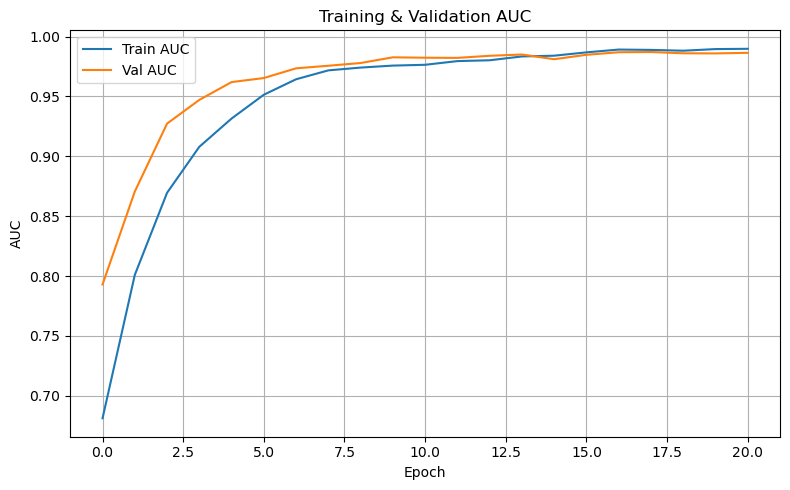

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Final Test Set Results (ANN Included):

                                                                 Best Params  \
Logistic Regression                                        {'model__C': 0.1}   
Neural Network (manual)                     {'epochs': 10, 'batch_size': 32}   
Artificial Neural Network  {'layers': [128, 64], 'dropout': [0.3, 0.2], '...   
Random Forest              {'model__max_depth': None, 'model__n_estimator...   
AdaBoost                                        {'model__n_estimators': 100}   
Decision Tree              {'model__max_depth': None, 'model__min_samples...   

                          Best Threshold       AUC  Accuracy Precision  \
Logistic Regression                 0.34  0.757496  0.821214  0.359209   
Neural Network (manual)             0.23  0.750039  0.877404  0.503425   
Artificial Neural Network           0.08  0.733143  0.850661  0.404814   
Random Forest                       0.33  0.714968  0.77223

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from category_encoders import TargetEncoder
from tensorflow.keras.metrics import AUC

# --- Encode categorical features ---
encoder = TargetEncoder(cols=cat_features, handle_unknown='value', handle_missing='value')
X_train_enc = encoder.fit_transform(X_train, y_train)
X_test_enc = encoder.transform(X_test)

# --- Define model architecture ---
model = Sequential([
    Input(shape=(X_train_enc.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(name='auc')])

# --- Early stopping callback ---
early_stop = EarlyStopping(
    monitor='val_auc',
    patience=3,
    mode='max',
    restore_best_weights=True
)

# --- Train model with validation split ---
history = model.fit(
    X_train_enc, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# --- Plot training/validation AUC ---
plt.figure(figsize=(8, 5))
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('Training & Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Predict probabilities on test set ---
y_proba = model.predict(X_test_enc).ravel()

# --- Threshold tuning ---
def find_best_threshold(y_true, y_proba, metric='f1'):
    thresholds = np.linspace(0, 1, 101)
    best_thresh, best_score = 0.5, 0
    for thresh in thresholds:
        y_pred = (y_proba >= thresh).astype(int)
        if metric == 'f1':
            score = f1_score(y_true, y_pred)
        elif metric == 'precision':
            score = precision_score(y_true, y_pred)
        elif metric == 'recall':
            score = recall_score(y_true, y_pred)
        if score > best_score:
            best_score = score
            best_thresh = thresh
    return best_thresh, best_score

best_thresh, best_f1 = find_best_threshold(y_test, y_proba, metric='f1')
y_pred_thresh = (y_proba >= best_thresh).astype(int)

# --- Store in results ---
results['Artificial Neural Network'] = {
    'Best Params': {
        'layers': [128, 64],
        'dropout': [0.3, 0.2],
        'batch_size': 32,
        'epochs': len(history.history['loss']),
    },
    'Best Threshold': best_thresh,
    'AUC': roc_auc_score(y_test, y_proba),
    'Accuracy': accuracy_score(y_test, y_pred_thresh),
    'Precision': precision_score(y_test, y_pred_thresh),
    'Recall': recall_score(y_test, y_pred_thresh),
    'F1': best_f1
}

# --- Final results ---
results_df = pd.DataFrame(results).T.sort_values(by='AUC', ascending=False)
print("\n📊 Final Test Set Results (ANN Included):\n")
print(results_df.round(4))

In [171]:
#!pip install pydot

In [172]:
#!pip install graphviz

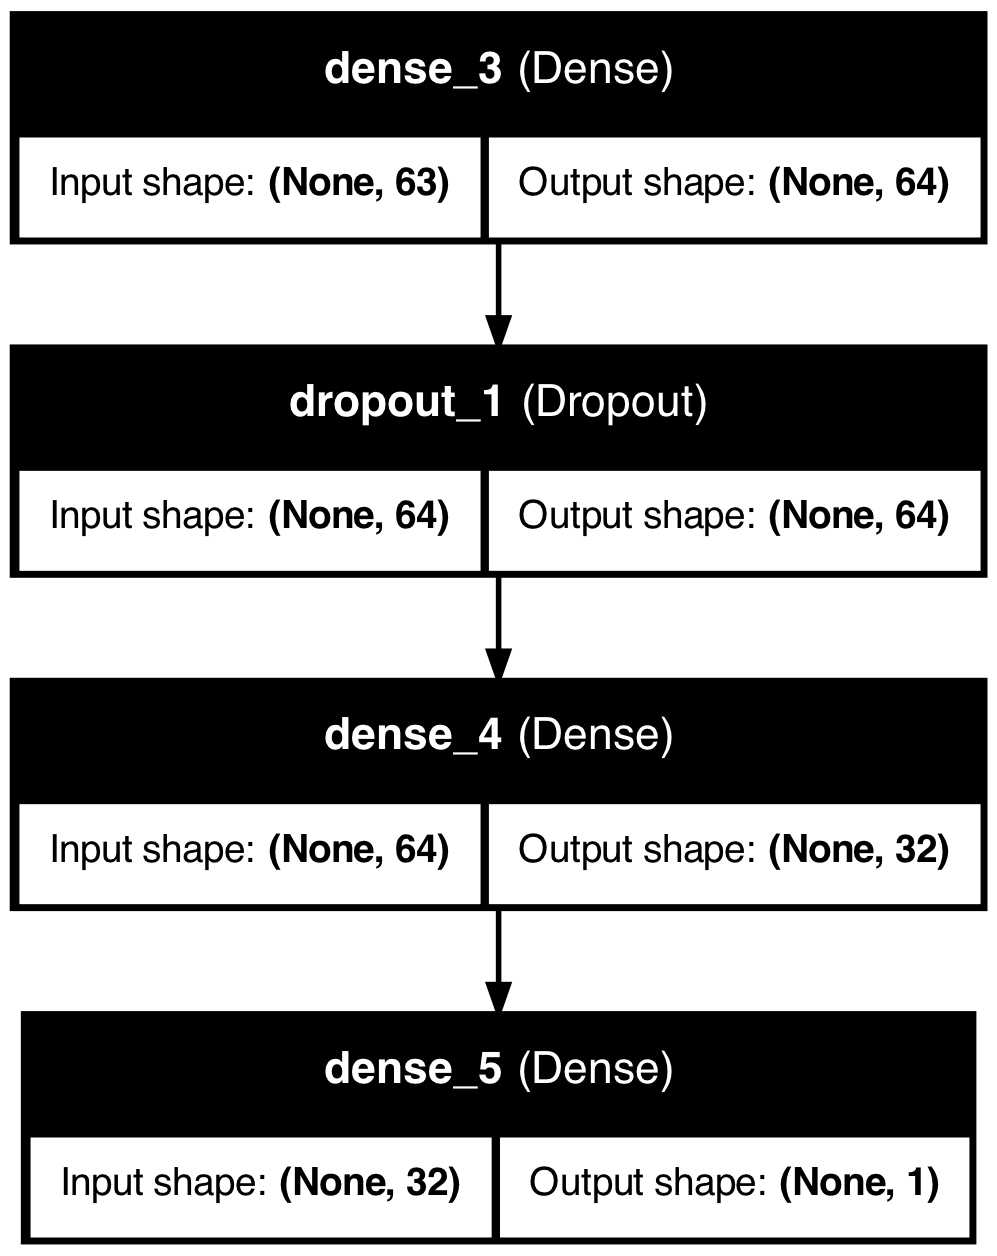

In [173]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_architecture.png')

In [ ]:
### Confusion Matrices Code for Model Comparison (run on colleagues computer)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Combine model names ---
all_model_names = list(best_models.keys()) + ['Artificial Neural Network']
n_models = len(all_model_names)

# --- Set layout: 3 rows, 2 columns ---
rows, cols = 3, 2

# --- Store confusion matrices ---
confusion_data = {}

# --- Sklearn models ---
for name in best_models:
    model = best_models[name]
    y_proba = model.predict_proba(X_test)[:, 1]
    best_thresh = results[name]['Best Threshold']
    y_pred = (y_proba >= best_thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    confusion_data[name] = cm

# --- ANN model (assumes y_proba already exists from previous code) ---
y_pred_ann = (y_proba >= results['Artificial Neural Network']['Best Threshold']).astype(int)
cm_ann = confusion_matrix(y_test, y_pred_ann)
confusion_data['Artificial Neural Network'] = cm_ann

# --- Plot 3x2 grid of confusion matrices ---
fig, axes = plt.subplots(rows, cols, figsize=(14, 18))
axes = axes.flatten()

for idx, model_name in enumerate(all_model_names):
    cm = confusion_data[model_name]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'],
                ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Remove any extra empty axes
for i in range(n_models, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig("confusion_matrices_3x2.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Confusion matrices saved to: confusion_matrices_3x2.png")

## Feature Importance Analysis

In [165]:
feature_names = X_train_enc.columns
feature_importance = {}

# Logistic Regression (absolute value of coefficients)
logreg_model = best_models['Logistic Regression']
logreg_importance = logreg_model.named_steps['model'].coef_[0]
feature_importance['Logistic Regression'] = pd.Series(logreg_importance, index=feature_names).abs()

# Decision Tree
dt_model = best_models['Decision Tree']
dt_importance = dt_model.named_steps['model'].feature_importances_
feature_importance['Decision Tree'] = pd.Series(dt_importance, index=feature_names)

# Random Forest
rf_model = best_models['Random Forest']
rf_importance = rf_model.named_steps['model'].feature_importances_
feature_importance['Random Forest'] = pd.Series(rf_importance, index=feature_names)

# AdaBoost
ada_model = best_models['AdaBoost']
ada_importance = ada_model.named_steps['model'].feature_importances_
feature_importance['AdaBoost'] = pd.Series(ada_importance, index=feature_names)

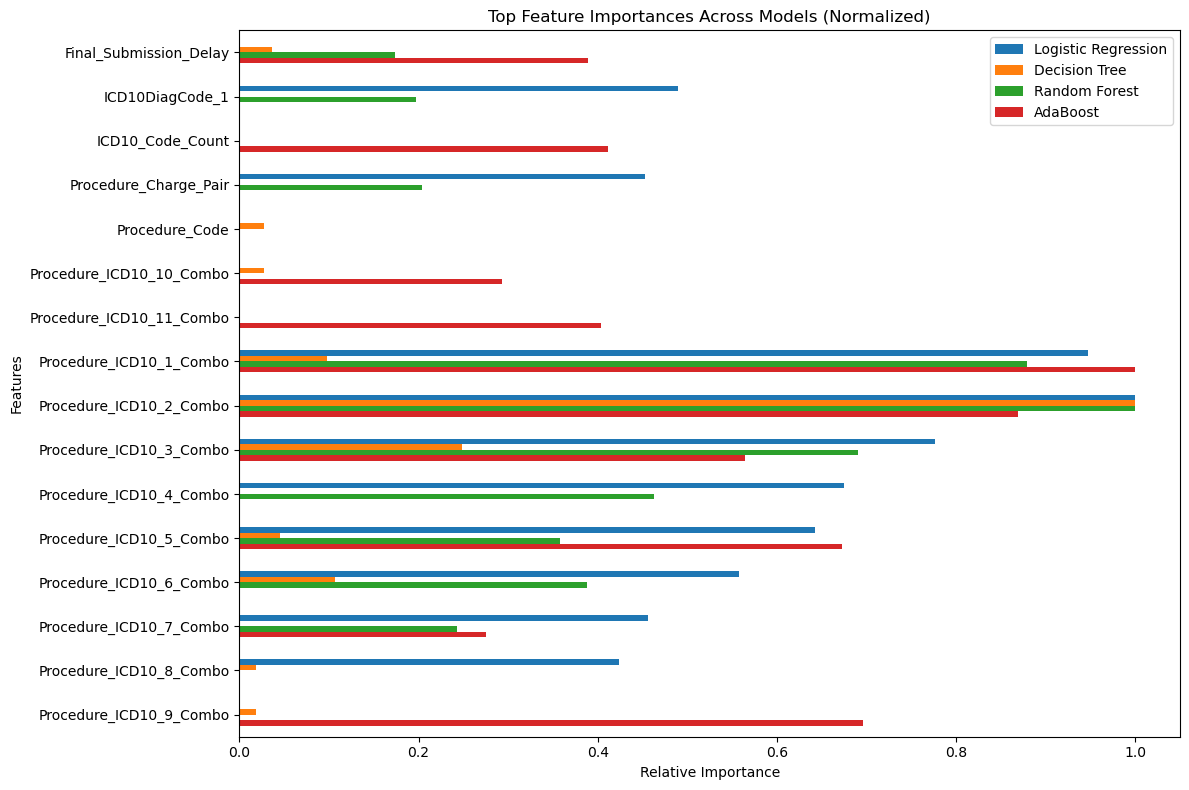

In [166]:
import matplotlib.pyplot as plt

# Top N features for each model
N = 10
top_features_df = pd.DataFrame({
    model: imp.sort_values(ascending=False).head(N)
    for model, imp in feature_importance.items()
}).fillna(0)

# Optional: Normalize each column to compare scale
norm_df = top_features_df.apply(lambda x: x / x.max(), axis=0)

# Plot normalized importance
norm_df.plot(kind='barh', figsize=(12, 8))
plt.title('Top Feature Importances Across Models (Normalized)')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.legend(loc='best')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [167]:
# Logistic Regression

print("Top 10 Logistic Regression Features:")
print(feature_importance['Logistic Regression'].sort_values(ascending=False).head(10))

Top 10 Logistic Regression Features:
Procedure_ICD10_2_Combo    5.571149
Procedure_ICD10_1_Combo    5.278989
Procedure_ICD10_3_Combo    4.326097
Procedure_ICD10_4_Combo    3.758570
Procedure_ICD10_5_Combo    3.577097
Procedure_ICD10_6_Combo    3.104179
ICD10DiagCode_1            2.724881
Procedure_ICD10_7_Combo    2.542649
Procedure_Charge_Pair      2.519487
Procedure_ICD10_8_Combo    2.363458
dtype: float64


In [168]:
# Decision Tree

print("Top 10 Decision Tree Features:")
print(feature_importance['Decision Tree'].sort_values(ascending=False).head(10))

Top 10 Decision Tree Features:
Procedure_ICD10_2_Combo     0.568510
Procedure_ICD10_3_Combo     0.141522
Procedure_ICD10_6_Combo     0.060843
Procedure_ICD10_1_Combo     0.055898
Procedure_ICD10_5_Combo     0.026014
Final_Submission_Delay      0.020549
Procedure_ICD10_10_Combo    0.015642
Procedure_Code              0.015333
Procedure_ICD10_9_Combo     0.010718
Procedure_ICD10_8_Combo     0.010548
dtype: float64


In [169]:
# Random Forest

print("Top 10 Random Forest Features:")
print(feature_importance['Random Forest'].sort_values(ascending=False).head(10))

Top 10 Random Forest Features:
Procedure_ICD10_2_Combo    0.155733
Procedure_ICD10_1_Combo    0.136962
Procedure_ICD10_3_Combo    0.107504
Procedure_ICD10_4_Combo    0.072032
Procedure_ICD10_6_Combo    0.060501
Procedure_ICD10_5_Combo    0.055739
Procedure_ICD10_7_Combo    0.037848
Procedure_Charge_Pair      0.031732
ICD10DiagCode_1            0.030673
Final_Submission_Delay     0.027040
dtype: float64


In [170]:
# AdaBoost

print("Top 10 AdaBoost Features:")
print(feature_importance['AdaBoost'].sort_values(ascending=False).head(10))

Top 10 AdaBoost Features:
Procedure_ICD10_1_Combo     0.122945
Procedure_ICD10_2_Combo     0.106865
Procedure_ICD10_9_Combo     0.085583
Procedure_ICD10_5_Combo     0.082689
Procedure_ICD10_3_Combo     0.069422
ICD10_Code_Count            0.050643
Procedure_ICD10_11_Combo    0.049686
Final_Submission_Delay      0.047785
Procedure_ICD10_10_Combo    0.036091
Procedure_ICD10_7_Combo     0.033828
dtype: float64


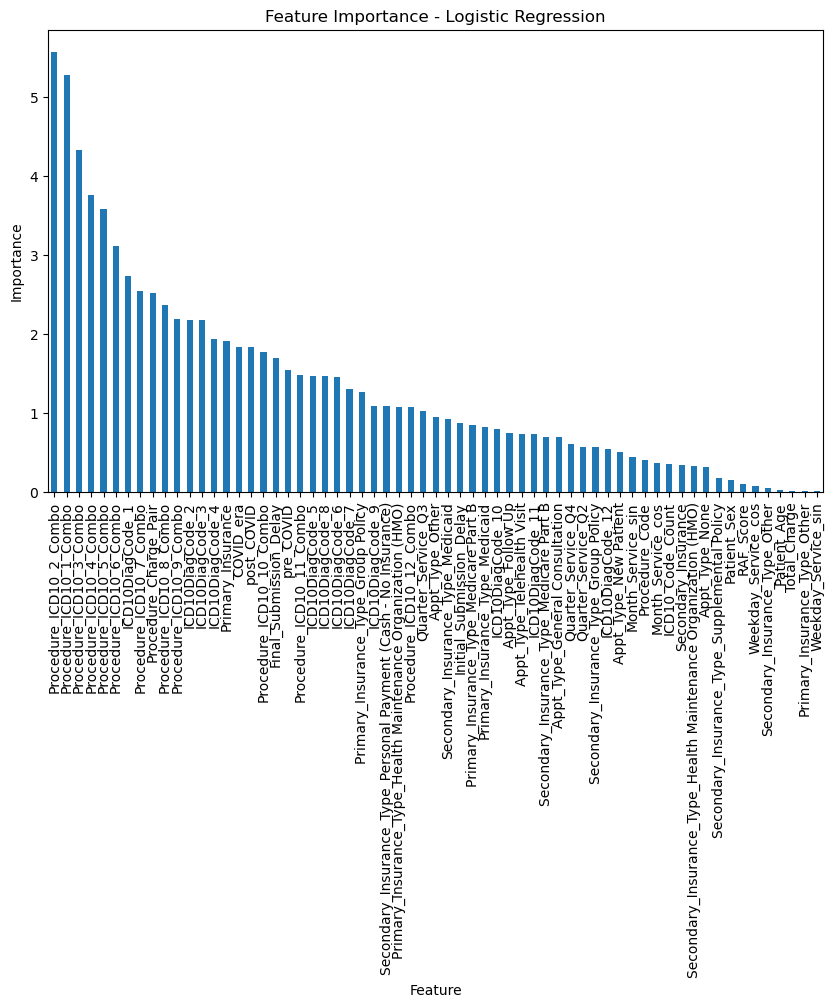

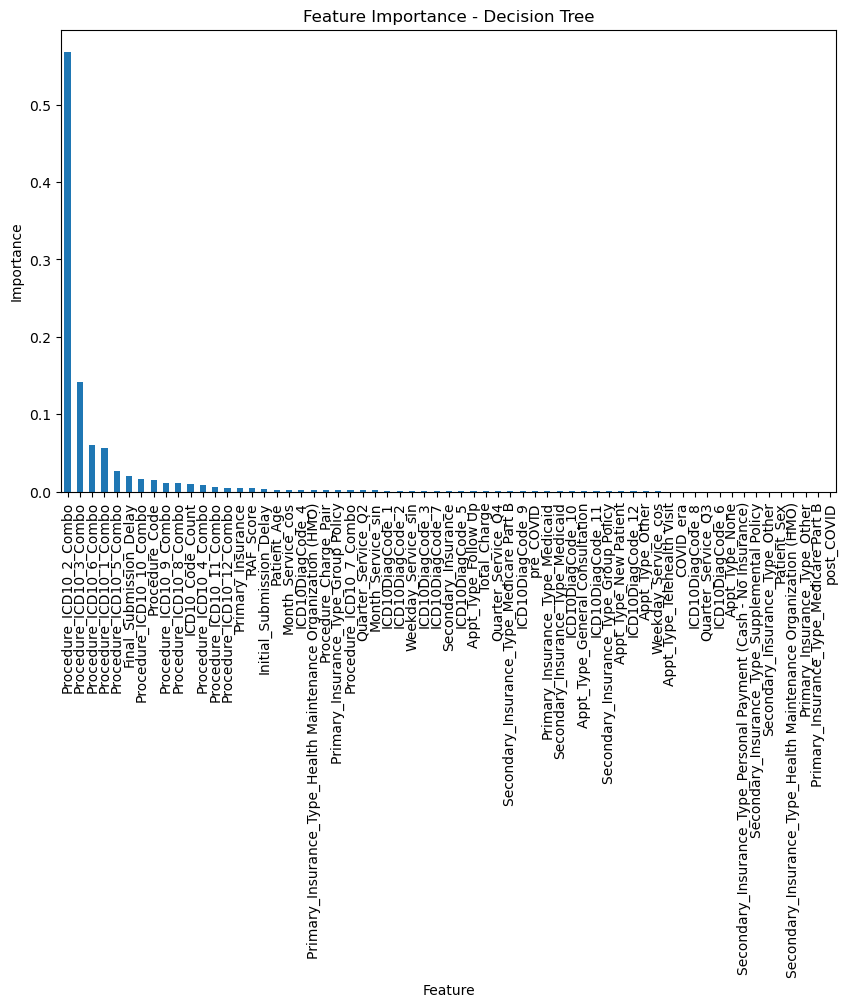

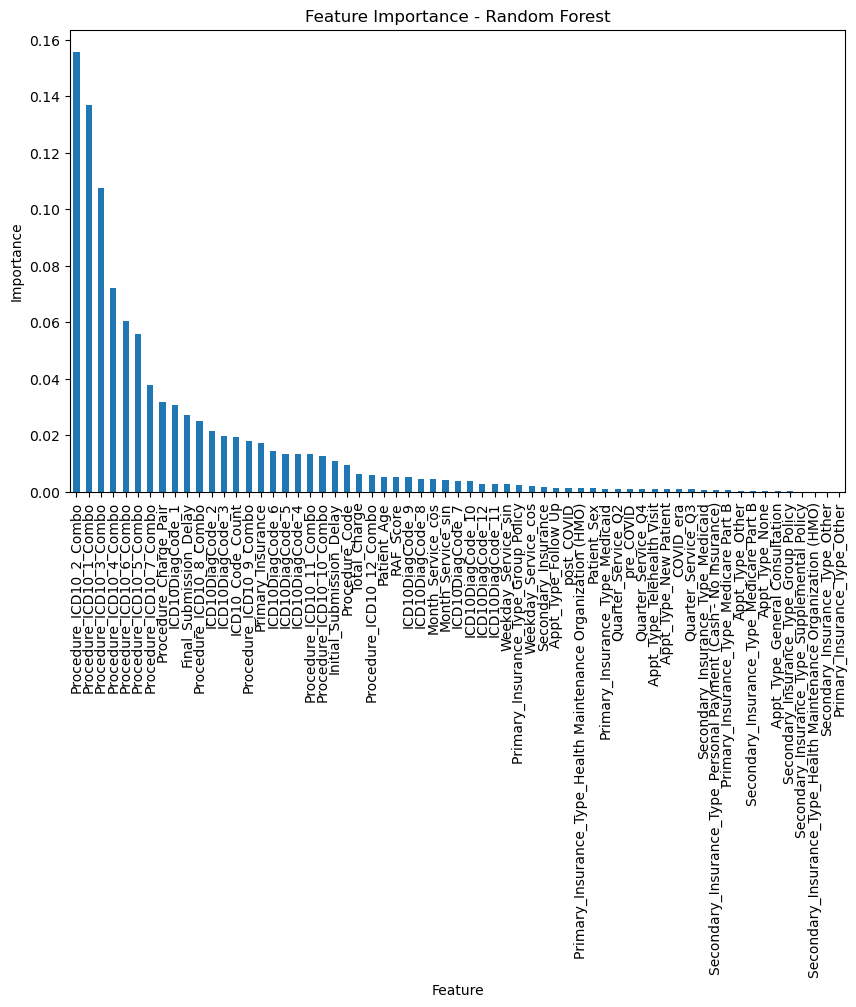

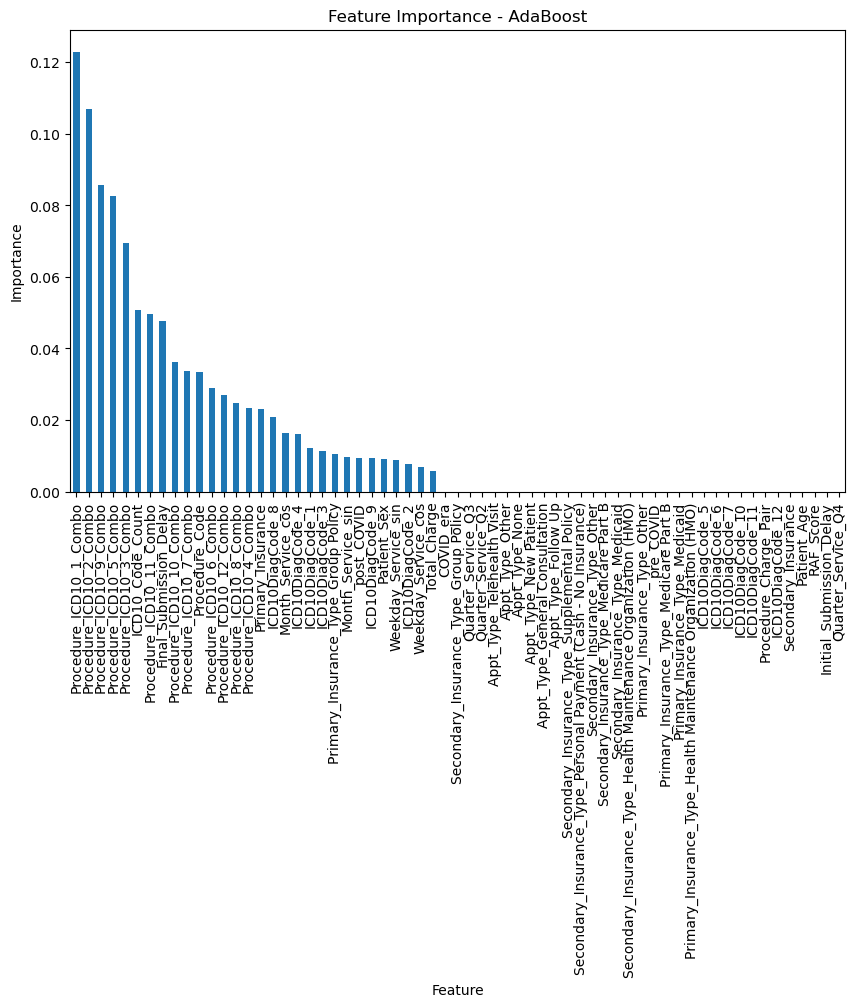

In [171]:
import matplotlib.pyplot as plt

for model_name, importance_series in feature_importance.items():
    importance_series_sorted = importance_series.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    importance_series_sorted.plot(kind='bar')
    plt.title(f"Feature Importance - {model_name}")
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.show()

In [172]:
# !pip install shap

In [173]:
# ANN

import shap

# Use a small sample from training set as background for SHAP
background = X_train_enc.sample(100, random_state=42).to_numpy()

# Convert test set to numpy for SHAP
X_test_array = X_test_enc.to_numpy()

## ANN Feature Importance Using SHAP values

In [174]:
# ANN Feature Importance Using SHAP values

# Convert to numpy arrays explicitly and ensure dtype is float32
background = X_train_enc.sample(100, random_state=42).astype(np.float32).to_numpy()
X_test_array = X_test_enc.astype(np.float32).to_numpy()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6763/6763 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6769/6769 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━

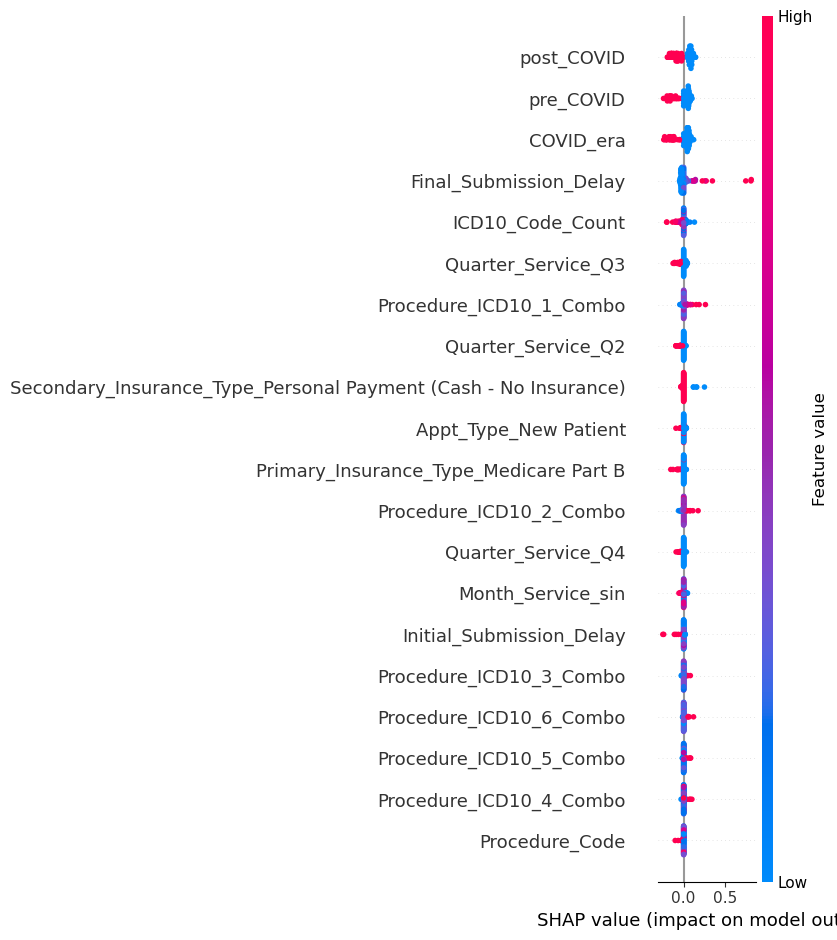

In [175]:
import shap
import numpy as np

# Ensure all SHAP input data is float32 NumPy arrays
X_background = X_train_enc.sample(100, random_state=0).astype(np.float32).to_numpy()
X_sample = X_test_enc.sample(100, random_state=88).astype(np.float32).to_numpy()
X_sample_df = X_test_enc.sample(100, random_state=88)  # still needed for shap.summary_plot

# Define model prediction wrapper
def predict_fn(x):
    return model.predict(x).flatten()

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_fn, X_background)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# Plot SHAP summary
shap.summary_plot(shap_values, X_sample_df, feature_names=feature_names)

In [176]:
# shap_values shape: (num_samples, num_features)
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# Create a DataFrame for easier handling
shap_importance_df = pd.DataFrame({
    'feature': feature_names,
    'mean_abs_shap': mean_abs_shap
})

# Sort descending by importance
shap_importance_df = shap_importance_df.sort_values(by='mean_abs_shap', ascending=False)

# Top 10 features
top10 = shap_importance_df.head(10)
print("Top 10 ANN Features:")
print(top10)

Top 10 ANN Features:
                                              feature  mean_abs_shap
23                                         post_COVID       0.091654
21                                          pre_COVID       0.078741
22                                          COVID_era       0.076107
20                             Final_Submission_Delay       0.060121
24                                   ICD10_Code_Count       0.029334
61                                 Quarter_Service_Q3       0.028081
25                            Procedure_ICD10_1_Combo       0.016645
60                                 Quarter_Service_Q2       0.013722
52  Secondary_Insurance_Type_Personal Payment (Cas...       0.012543
56                              Appt_Type_New Patient       0.011996


In [177]:
# Manually Create EBM Feature Importance
ebm_top_features = {
    'Procedure_ICD10_2_Combo': 2.6231,
    'Procedure_ICD10_1_Combo': 2.5128,
    'Procedure_ICD10_5_Combo': 1.8644,
    'Procedure_ICD10_4_Combo': 1.6338,
    'Procedure_ICD10_3_Combo': 1.6106,
    'ICD10_Code_Count': 1.5371,
    'Final_Submission_Delay': 1.4300,
    'Procedure_ICD10_9_Combo': 1.2694,
    'Procedure_Code': 1.0608,
    'Procedure_ICD10_6_Combo': 1.0151
}
feature_importance['EBM'] = pd.Series(ebm_top_features)

In [181]:
# Manually Create ANN Feature Importance
ann_top_features = {
    'post_COVID': 0.154058,
    'pre_COVID': 0.121726,
    'COVID_era': 0.120118,
    'Final_Submission_Delay': 0.052069,
    'ICD10_Code_Count': 0.038101,
    'Quarter_Service_Q3': 0.026800,
    'Secondary_Insurance_Type_Personal Payment': 0.019263,
    'Procedure_ICD10_1_Combo': 0.018757,
    'Procedure_ICD10_2_Combo': 0.015105,
    'Appt_Type_New Patient': 0.014197
}
feature_importance['ANN'] = pd.Series(ann_top_features)

In [182]:
# Update Top Features Dataframe to Include EBM and ANN results

# Top N features for each model
N = 10
top_features_df = pd.DataFrame({
    model: imp.sort_values(ascending=False).head(N)
    for model, imp in feature_importance.items()
}).fillna(0)

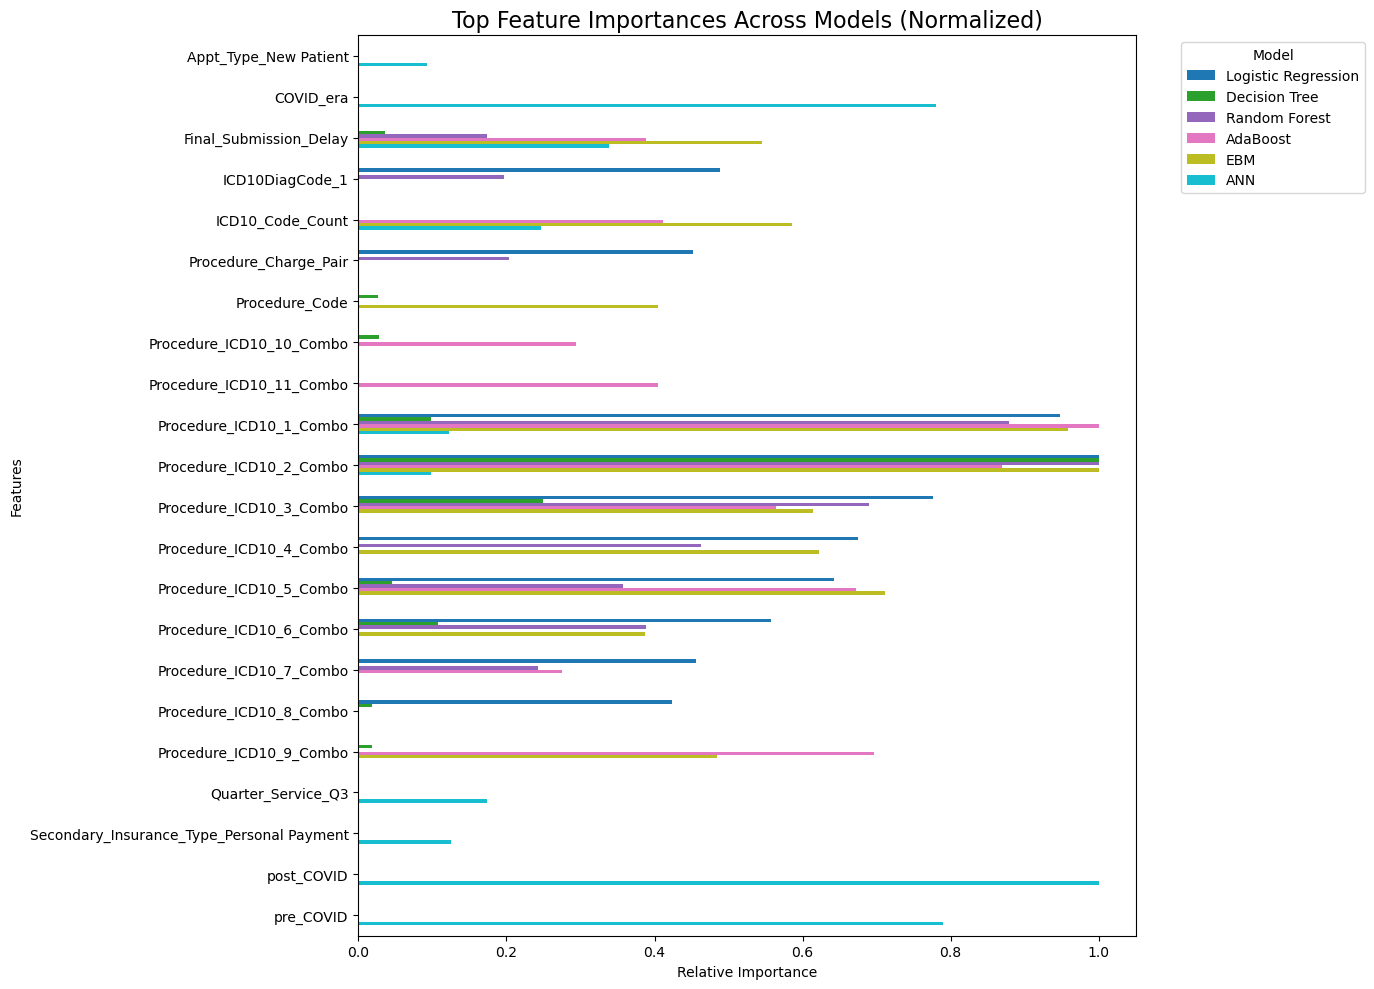

In [183]:
# Normalize for relative comparison
norm_df = top_features_df.apply(lambda x: x / x.max(), axis=0)

# Plot
norm_df.plot(kind='barh', figsize=(14, 10), colormap='tab10')
plt.title('Top Feature Importances Across Models (Normalized)', fontsize=16)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

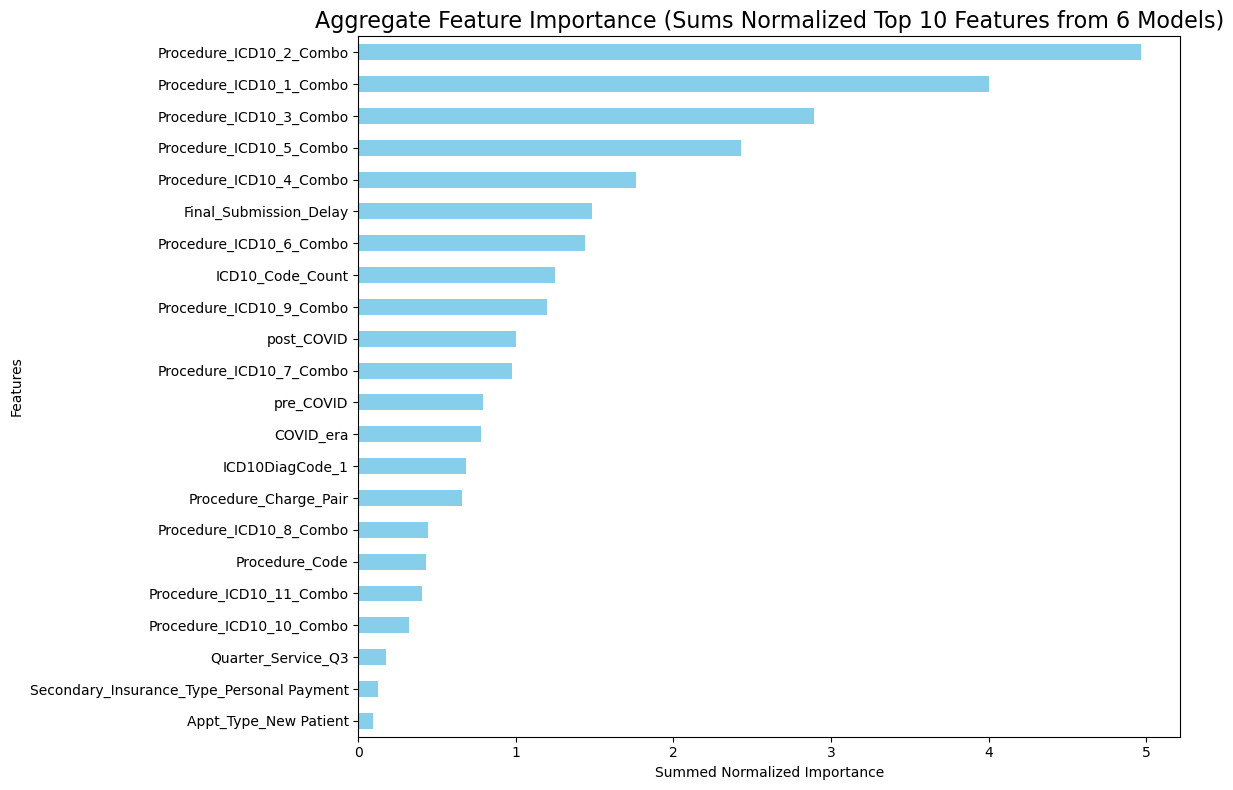

In [188]:
# Aggregate Feature Importance Across all 6 ML Models

# Step 1: Normalize importance values (if not already done)
norm_df = top_features_df.apply(lambda x: x / x.max(), axis=0)

# Step 2: Sum normalized importance across models
combined_importance = norm_df.sum(axis=1).sort_values(ascending=False)

# Step 3: Plot the combined importance
plt.figure(figsize=(12, 8))
combined_importance.plot(kind='barh', color='skyblue')
plt.title('Aggregate Feature Importance (Sums Normalized Top 10 Features from 6 Models)', fontsize=16)
plt.xlabel('Summed Normalized Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Put the most important features at the top
plt.tight_layout()
plt.show()